# Import libraries and setup

In [1]:
# Import libraries we may need
import scanpy as sc
import squidpy as sq
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import scanpy.external as sce
import wget
import yaml
import wget
import astir
import dill
#import umap
#reducer = umap.UMAP()
import statsmodels as sm
import anndata as ad

#To display multiple dataframes in same output
from IPython.display import display

#Loading bar functionality for long tasks
from tqdm import tqdm

#For multiprocessing
from functools import partial
from multiprocessing import Pool

#My module for importing IMC data into AnnData format
import mikeimc as mimc
import mikeimc_v2 as mikeimc_v2

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #276: omp_set_nested routine deprecated, please u

In [2]:
# Set up output figure settings
plt.rcParams['figure.figsize']=(64,64) #rescale figures, increase sizehere

# Set up scanpy settings
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100, dpi_save=300) #Increase DPI for better resolution figures
#sc.logging.print_versions()

In [ ]:
#load the session
dill.load_session('DC_SQUIDPY.db')

In [ ]:
#save the session
dill.dump_session('DC_SQUIDPY.db')

In [ ]:
adata_subset2

In [ ]:
# load main adata
adata_subset2 = ad.read_h5ad('./2_h5ad files/adata_subset2')

In [ ]:
adata_subset2

In [ ]:
adata_subset3.write('adata_subset3.h5ad')

# ImageContainer object

In [ ]:
img_file = ('./A_0205_1/A_0205_1_cell_mask2.tiff')

In [ ]:
img = sq.im.ImageContainer(img_file, layer="A_0205_1_mask")

In [ ]:
img

In [ ]:
img_file2 = ('./A_0205_1/DNA1_Ir191.tiff')

In [ ]:
img.add_img(img_file2, layer="DNA1_Ir191")

In [ ]:
img

In [ ]:
img_file3 = ('./A_0205_1/Collagen1_Tm169.tiff')
img.add_img(img_file3, layer="Collagen1_Tm169")

In [ ]:
img["A_0205_1_mask"].attrs["segmentation"] = True

In [ ]:
img["A_0205_1_mask"] = img["A_0205_1_mask"].astype(int)  # segmentation layer should be int

In [ ]:
img.show("Collagen1_Tm169")

In [ ]:
img.show("Collagen1_Tm169", segmentation_layer="A_0205_1_mask", segmentation_alpha=0.5)

# Squidpy - neighbourhood analysis

In [ ]:
#The .copy() makes a completely seperate copy for neigh analysis
adata_subset3 = adata_subset2.copy()

In [ ]:
adata_subset3

In [7]:
col_df = pd.read_csv('mikeimc_approach/colours/pheno_colours2.csv')
colour_palette = col_df.set_index('pheno_cluster_new').to_dict()
colour_palette['colour']

{'SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil': '#336600',
 'ArginaseLowVISTALow Neutrophil': '#9cded6',
 'ArginaseLowVISTALow Activated Neutrophil': '#0fcfc0',
 'ArginaseHighVISTAHigh Activated Neutrophil': '#8dd593',
 'RBC': '#f71f0f',
 'Endothelial cell': '#e07b91',
 'Activated Endothelial cell': '#0070C0',
 'Proliferative Endothelial cell': '#fce5cd',
 'Smooth Muscle cell': '#FA8000',
 'Fibroblast': '#b86cb9',
 'Proliferative Fibroblast': '#d33f6a',
 'Apoptotic Fibroblast': '#FF7DA8',
 'SARSCoV2+ Interstitial Macrophage': '#00B0F0',
 'Apoptotic SARSCoV2+  Alveolar Macrophage': '#FFD966',
 'Interstitial Macrophage': '#4a6fe3',
 'Proliferating Interstitial Macrophage': '#4900EF',
 'Alveolar Macrophage': '#A381EF',
 'Apoptotic Alveolar Macrophage': '#8595e1',
 'CD11c+ cell': '#b5bbe3',
 'Classical Monocyte': '#b86cb9',
 'AT2 cell': '#d6bcc0',
 'SARSCoV2+ AT2 cell': '#A53F02',
 'SARSCoV2+ Epithelial cell': '#b9877d',
 'Epithelial cell': '#f0b98d',
 'Proliferative Epithelial ce

# Subset anndata object in disease groups

In [ ]:
adata_subset3.obs['Patient']

In [ ]:
# This will list out the columns you may want to now convert...
adata_subset2.obs.columns.tolist()

In [ ]:
# Alter this with the categorical obs from above
for i in ['ROI', 'TMAID', 'CaseID', 'Region','Patient', 'Group', 'Diagnosis']:
    adata_subset2.obs[i]=adata_subset2.obs[i].astype('category')

In [ ]:
adata_subset2.obs.ROI.cat.categories

In [ ]:
#Subset anndata object according to the disease group
#The ~ sign indicates to the code to not include what is in the selection
#remove the ~ sign to include what is in the selection
ad_COVID = adata_subset2[adata_subset2.obs['Group'].isin(['COVID-19']),:].copy()
ad_Pneumonia = adata_subset2[adata_subset2.obs['Group'].isin(['Pneumonia']),:].copy()
ad_Non_Pneumonia = adata_subset2[adata_subset2.obs['Group'].isin(['Non_Pneumonia']),:].copy()


In [ ]:
ad_COVID.write('adata_COVID')
ad_Pneumonia.write('adata_Pneumonia')
ad_Non_Pneumonia.write('adata_Non_Pneumonia')

In [ ]:
ad_COVID.obs['ROI']

In [ ]:
#Subset anndata object according to the COVID post-mortem PCR results
ad_POS = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-03', 'COS-05', 'COS-06', 'COS-07', 'COS-08', 'COS-09', 'COS-012', 'COS-013', 'COS-015']),:].copy()
ad_NEG = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-02', 'COS-04', 'COS-014', 'COS-016']),:].copy()

In [ ]:
ad_POS.write('adata_POS')
ad_NEG.write('adata_NEG')

In [ ]:
#Subset anndata object according to the HIV status in the COVID+ group
ad_HIV_POS = adata_subset2[adata_subset2.obs['Patient'].isin(['COS-03', 'COS-05', 'COS-06', 'COS-07', 'COS-08']),:].copy()
ad_HIV_NEG = adata_subset2[adata_subset2.obs['Patient'].isin(['COS-09',  'COS-012', 'COS-013', 'COS-015']),:].copy()

In [ ]:
ad_HIV_POS.obs['ROI']

In [ ]:
ad_HIV_POS.write('./2_h5ad files/ad_HIV_POS')
ad_HIV_NEG.write('./2_h5ad files/ad_HIV_NEG')

In [ ]:
# Exclude RBCs
ad_COVID = ad_COVID[~ad_COVID.obs['cell_type'].isin(['RBCs']),:].copy()
ad_Pneumonia = ad_Pneumonia[~ad_Pneumonia.obs['cell_type'].isin(['RBCs']),:].copy()
ad_Non_Pneumonia = ad_Non_Pneumonia[~ad_Non_Pneumonia.obs['cell_type'].isin(['RBCs']),:].copy()
ad_HIV_POS = ad_HIV_POS[~ad_HIV_POS.obs['cell_type'].isin(['RBCs']),:].copy()
ad_HIV_NEG = ad_HIV_NEG[~ad_HIV_NEG.obs['cell_type'].isin(['RBCs']),:].copy()

In [ ]:
ad_COVID.write('./2_h5ad files/adata_COVID')
ad_Pneumonia.write('./2_h5ad files/adata_Pneumonia')
ad_Non_Pneumonia.write('./2_h5ad files/adata_Non_Pneumonia')
ad_HIV_POS.write('./2_h5ad files/adata_HIV_POS')
ad_HIV_NEG.write('./2_h5ad files/adata_HIV_NEG')

In [3]:
ad_COVID = ad.read_h5ad('./2_h5ad files/adata_COVID')
ad_Pneumonia = ad.read_h5ad('./2_h5ad files/adata_Pneumonia')
ad_Non_Pneumonia = ad.read_h5ad('./2_h5ad files/adata_Non_Pneumonia')
ad_HIV_POS = ad.read_h5ad('./2_h5ad files/ad_HIV_POS')
ad_HIV_NEG = ad.read_h5ad('./2_h5ad files/ad_HIV_NEG')

In [4]:
ad_COVID

AnnData object with n_obs × n_vars = 53762 × 39
    obs: 'Master_Index', 'ROI', 'TMAID', 'CaseID', 'Region', 'Patient', 'Group', 'Diagnosis', 'X_loc', 'Y_loc', 'umap_density_Group', 'cell_type', 'hierarchy', 'pheno_cluster', 'HIV', 'Histo', 'pheno_cluster_new'
    uns: 'Group_colors', 'cell_type_colors', 'dendrogram_pheno_cluster', 'hierarchy_colors', 'neighbors', 'pca', 'pheno_cluster_colors', 'pheno_cluster_new_colors', 'pheno_cluster_new_nhood_enrichment', 'spatial_neighbors', 'umap', 'umap_density_Group_params'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [ ]:
# Set `skip_data=False` if you also want to export the data.
ad_COVID.write_csvs(dirname='./1_CSV files/adata_COVID', skip_data=False)

In [ ]:
ad_HIV_POS.write_csvs(dirname='./1_CSV files/adata_HIV_POS', skip_data=False)
ad_HIV_NEG.write_csvs(dirname='./1_CSV files/adata_HIV_NEG', skip_data=False)

In [ ]:
ad_HIV_NEG

# Subset anndata object per patient case

In [ ]:
#Subset anndata object per patient case
ad_COS2 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-02']),:].copy()
ad_COS3 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-03']),:].copy()
ad_COS4 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-04']),:].copy()
ad_COS5 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-05']),:].copy()
ad_COS6 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-06']),:].copy()
ad_COS7 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-07']),:].copy()
ad_COS8 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-08']),:].copy()
ad_COS9 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-09']),:].copy()
ad_COS12 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-012']),:].copy()
ad_COS13 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-013']),:].copy()
ad_COS14 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-014']),:].copy()
ad_COS15 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-015']),:].copy()
ad_COS16 = adata_subset3[adata_subset3.obs['Patient'].isin(['COS-016']),:].copy()


# Subset anndata object per lung region per patient case

In [ ]:
#Subset anndata object per lung region per patient case
ad_COS2_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-02-Right']),:].copy()

ad_COS3_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-03-Right']),:].copy()
ad_COS3_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-03-Left']),:].copy()

ad_COS4_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-04-Right']),:].copy()
ad_COS4_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-04-Left']),:].copy()

ad_COS5_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-05-Right']),:].copy()
ad_COS5_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-05-Left']),:].copy()

ad_COS6_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-06-Right']),:].copy()
ad_COS6_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-06-Left']),:].copy()

ad_COS7_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-07-Right']),:].copy()
ad_COS7_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-07-Left']),:].copy()

ad_COS8_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-08-Right']),:].copy()
ad_COS8_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-08-Left']),:].copy()

ad_COS9_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-09-Right']),:].copy()
ad_COS9_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-09-Left']),:].copy()

ad_COS12_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-012-Right']),:].copy()
ad_COS12_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-012-Left']),:].copy()

ad_COS13_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-013-Right']),:].copy()
ad_COS13_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-013-Left']),:].copy()

ad_COS14_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-014-Right']),:].copy()
ad_COS14_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-014-Left']),:].copy()

ad_COS15_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-015-Right']),:].copy()
ad_COS15_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-015-Left']),:].copy()

ad_COS16_right = adata_subset3[adata_subset3.obs['Region'].isin(['COS-016-Right']),:].copy()
ad_COS16_left = adata_subset3[adata_subset3.obs['Region'].isin(['COS-016-Left']),:].copy()

# Spatial neighbors and neighborhood enrichment - Michael's approach - USE THIS


In [ ]:
import nhood_enrich_radius as ne #run outside squidpy env

In [ ]:
ne.nhood_enrichment_hyperion(ad_COVID,'pheno_cluster_new', 'ROI', average_over_rois=True)

In [ ]:
ad_COVID

In [ ]:
ne.nhood_enrichment_hyperion(ad_Pneumonia,'pheno_cluster_new','ROI',average_over_rois=True)

In [ ]:
ne.nhood_enrichment_hyperion(ad_Non_Pneumonia,'pheno_cluster_new','ROI',average_over_rois=True)

In [ ]:
ne.nhood_enrichment_hyperion(ad_HIV_NEG,'pheno_cluster_new','ROI',average_over_rois=True)

In [ ]:
ne.nhood_enrichment_hyperion(ad_HIV_POS,'pheno_cluster_new','ROI',average_over_rois=True)

In [ ]:
sq.pl.nhood_enrichment(ad_COVID, cluster_key="pheno_cluster_new", cmap='bwr', mode='zscore', vmin=-2, vmax=2, palette = colour_palette['colour'], save='NE_COVID.pdf')
#method='ward',


In [ ]:
sq.pl.nhood_enrichment(ad_Pneumonia, cluster_key="pheno_cluster_new", cmap='bwr', mode='zscore', vmin=-2, vmax=2, palette = colour_palette['colour'], save='NE_Pneumonia.pdf')


In [ ]:
sq.pl.nhood_enrichment(ad_Non_Pneumonia, cluster_key="pheno_cluster_new", cmap='bwr', mode='zscore', vmin=-2, vmax=2, palette = colour_palette['colour'], save='NE_Non_Pneumonia.pdf')


In [ ]:
sq.pl.nhood_enrichment(ad_HIV_NEG, cluster_key="pheno_cluster_new", cmap='bwr', mode='zscore', vmin=-2, vmax=2, palette = colour_palette['colour'], save='NE_HIV_NEG.pdf')
#method='ward',


In [ ]:
sq.pl.nhood_enrichment(ad_HIV_POS, cluster_key="pheno_cluster_new", cmap='bwr', mode='zscore', vmin=-2, vmax=2, palette = colour_palette['colour'], save='NE_HIV_POS.pdf')
#method='ward',


# Spatial neighbors and neighborhood enrichment - 10X Visium approach

In [ ]:
#sq.gr.spatial_neighbors(adata_covid26, coord_type = 'generic', n_neighs=4)
#n_neighs=4, radius=2
#delaunay

In [ ]:
sq.gr.nhood_enrichment(adata_nonCM_merge, cluster_key="pheno_cluster", seed=1234, copy=False)


In [ ]:
sq.pl.nhood_enrichment(adata_CM2_merge, cluster_key="pheno_cluster", cmap='bwr', mode='zscore', method = 'ward', vmax=50, palette = colour_palette['colour'], save='NE_CM2_zscore_pheno_cluster_ward.png')


In [ ]:
sq.pl.nhood_enrichment(adata_CM2_merge, cluster_key="pheno_cluster", vmax=150, cmap='bwr', mode='zscore', palette = colour_palette['colour'], save='NE_CM2_zscore_pheno_cluster.png')


In [6]:
ad_COVID.obs['ROI']

2358      0305_1_A
2359      0305_1_A
2360      0305_1_A
2361      0305_1_A
2362      0305_1_A
            ...   
184074    1507_2_C
184075    1507_2_C
184076    1507_2_C
184077    1507_2_C
184078    1507_2_C
Name: ROI, Length: 53762, dtype: category
Categories (84, object): ['0305_1_A', '0305_1_C', '0305_2_A', '0307_1_A', ..., '1507_1_C', '1507_2_A', '1507_2_B', '1507_2_C']

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


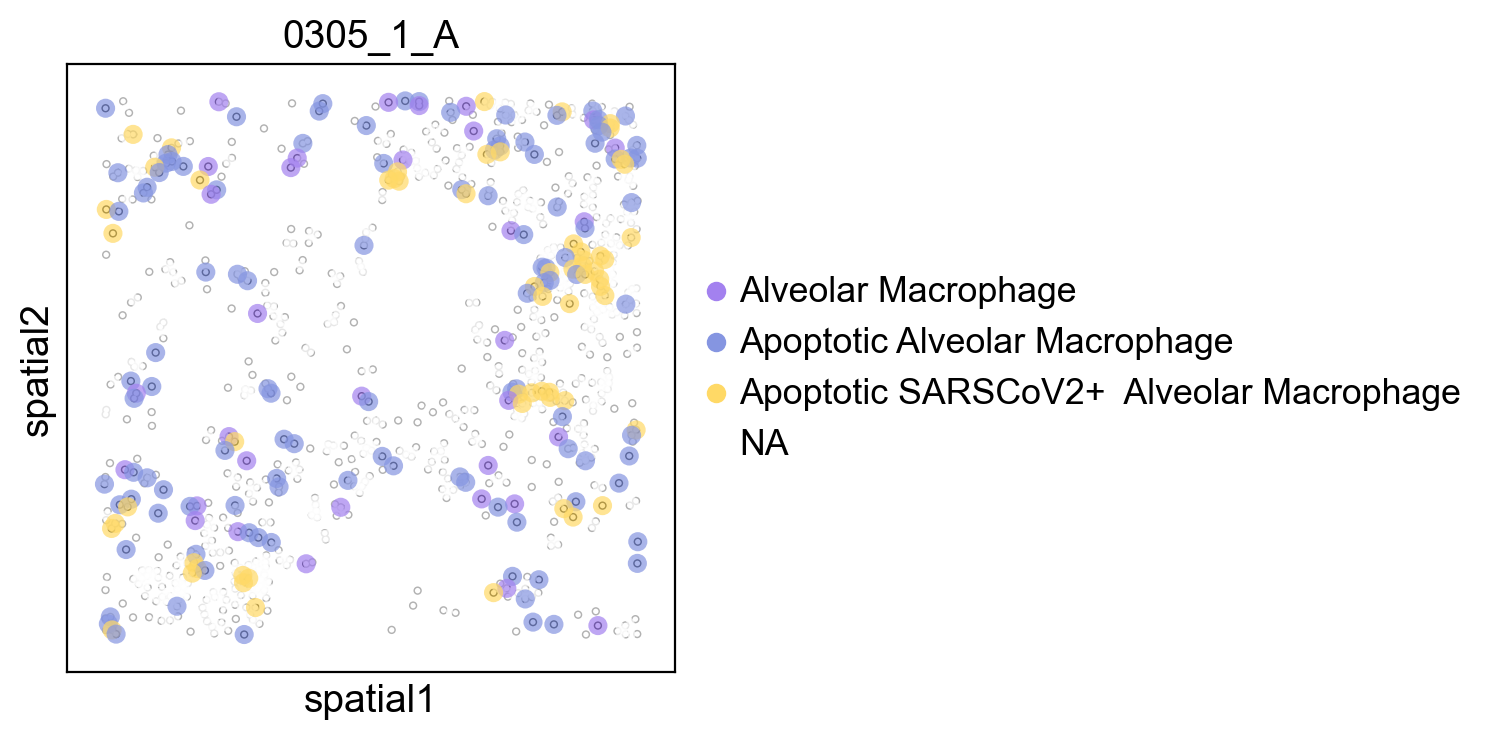

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


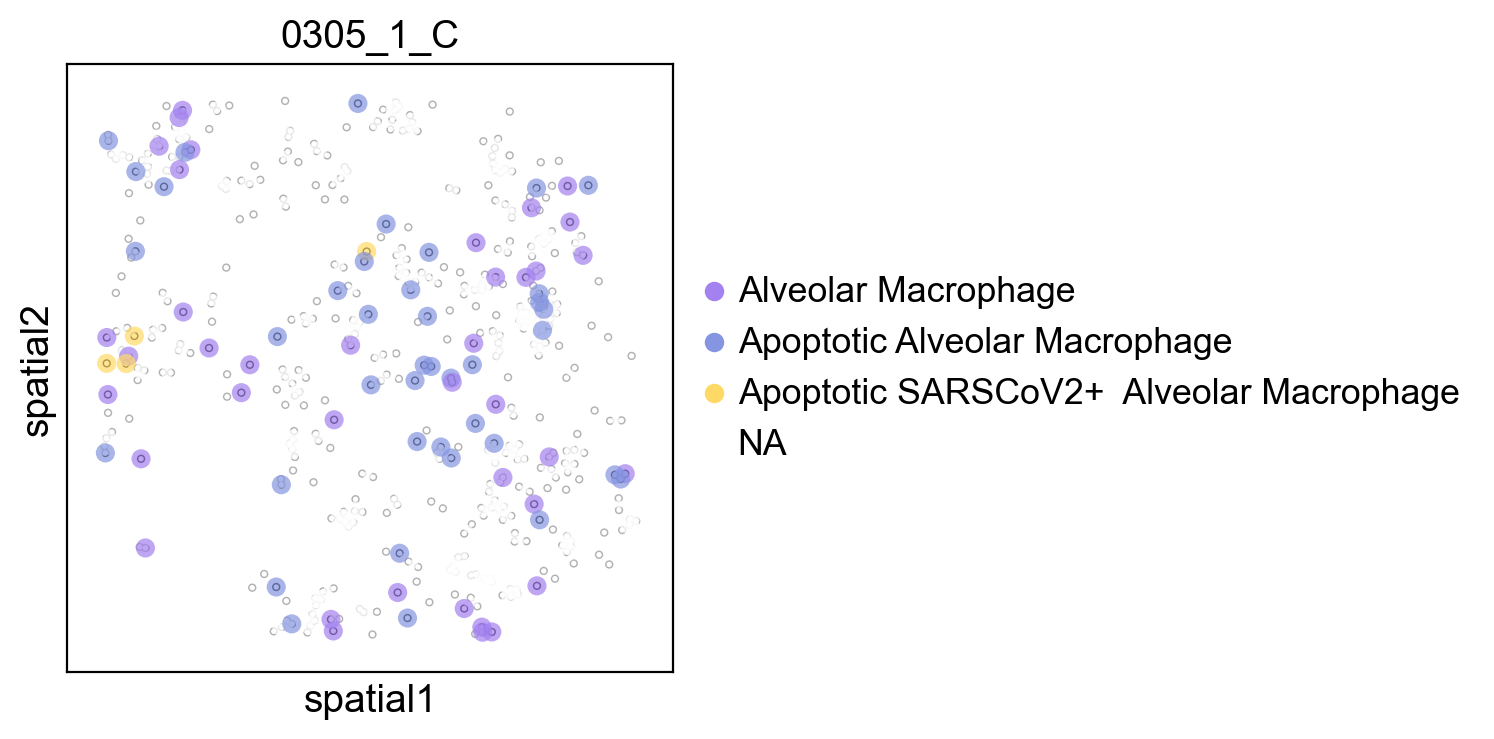

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


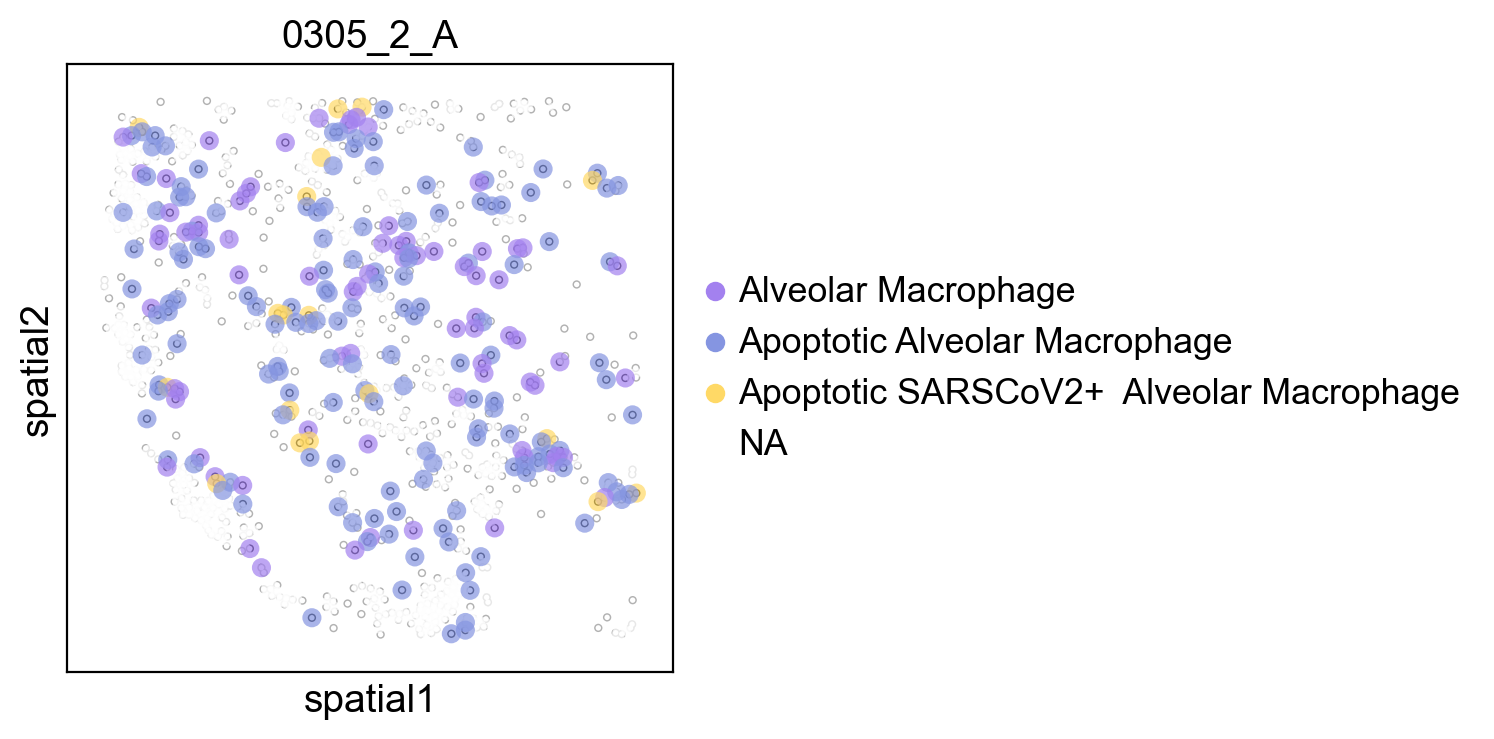

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


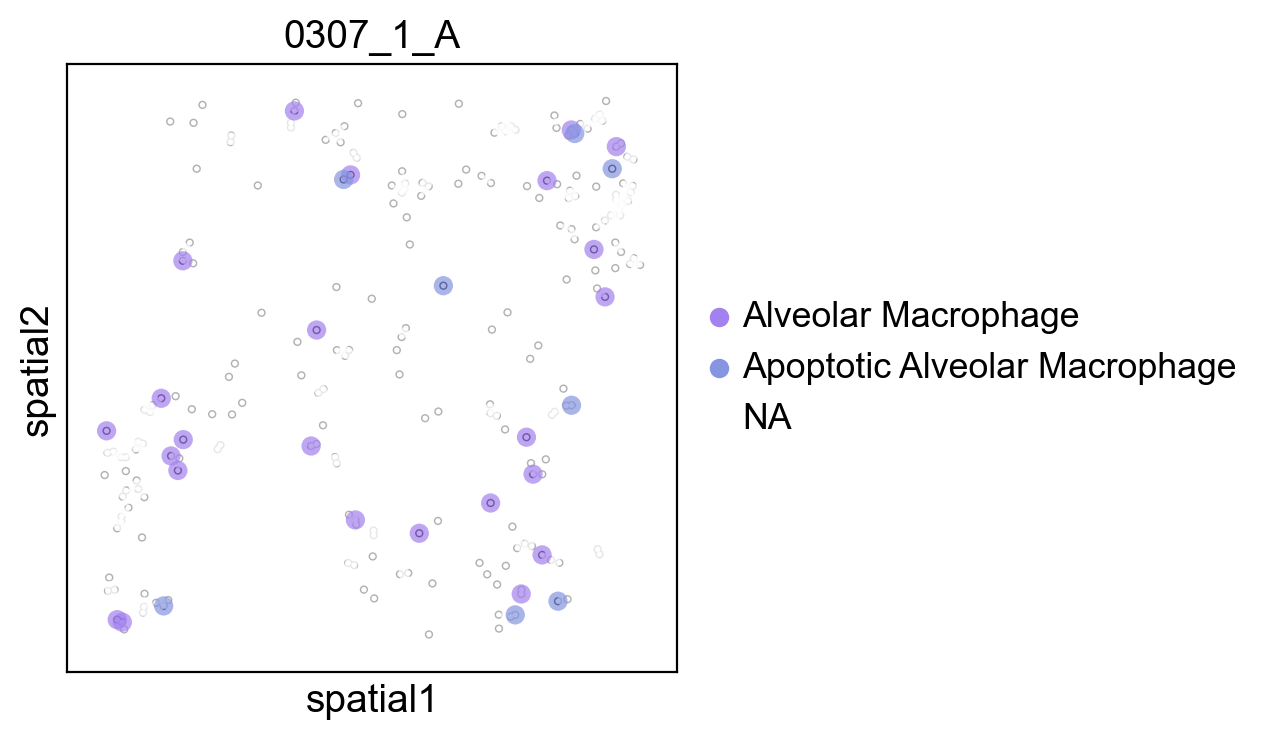

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


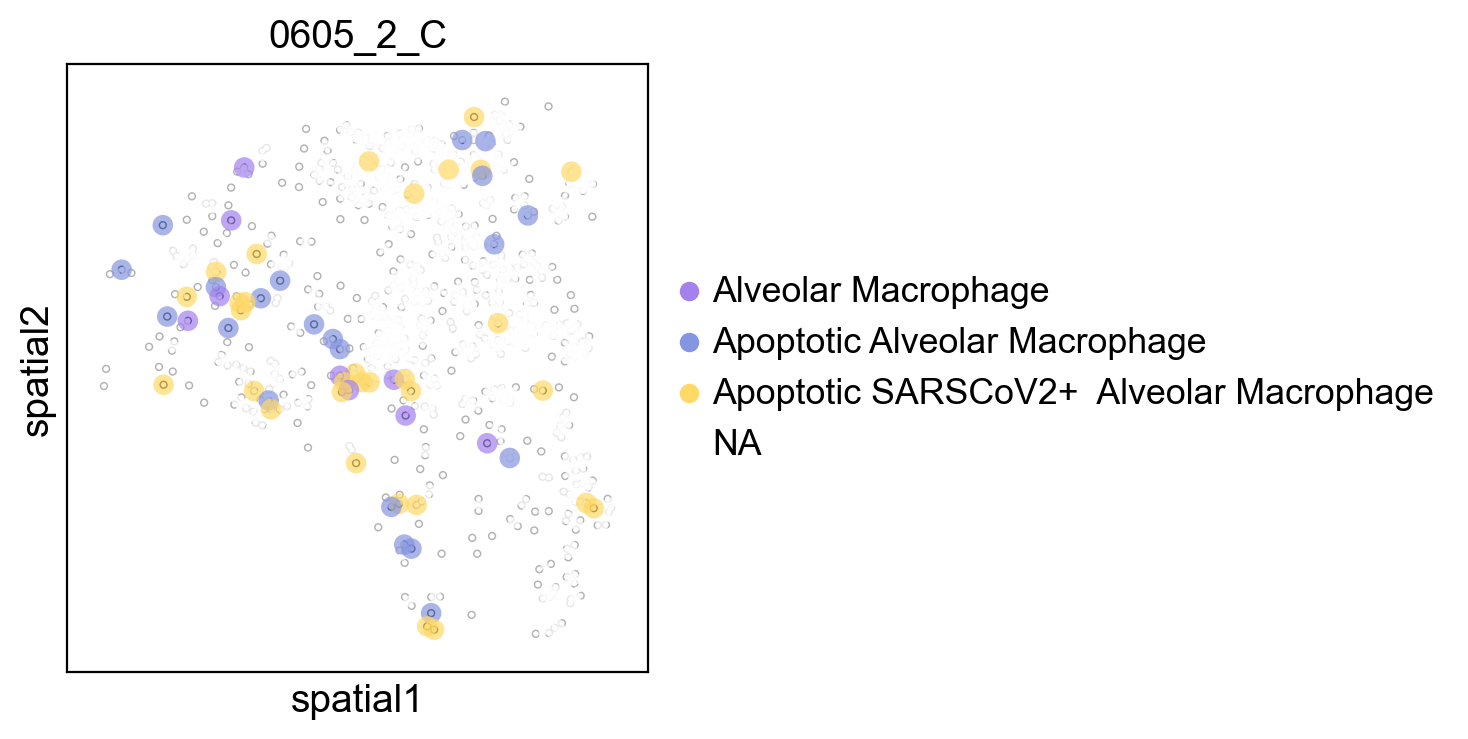

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


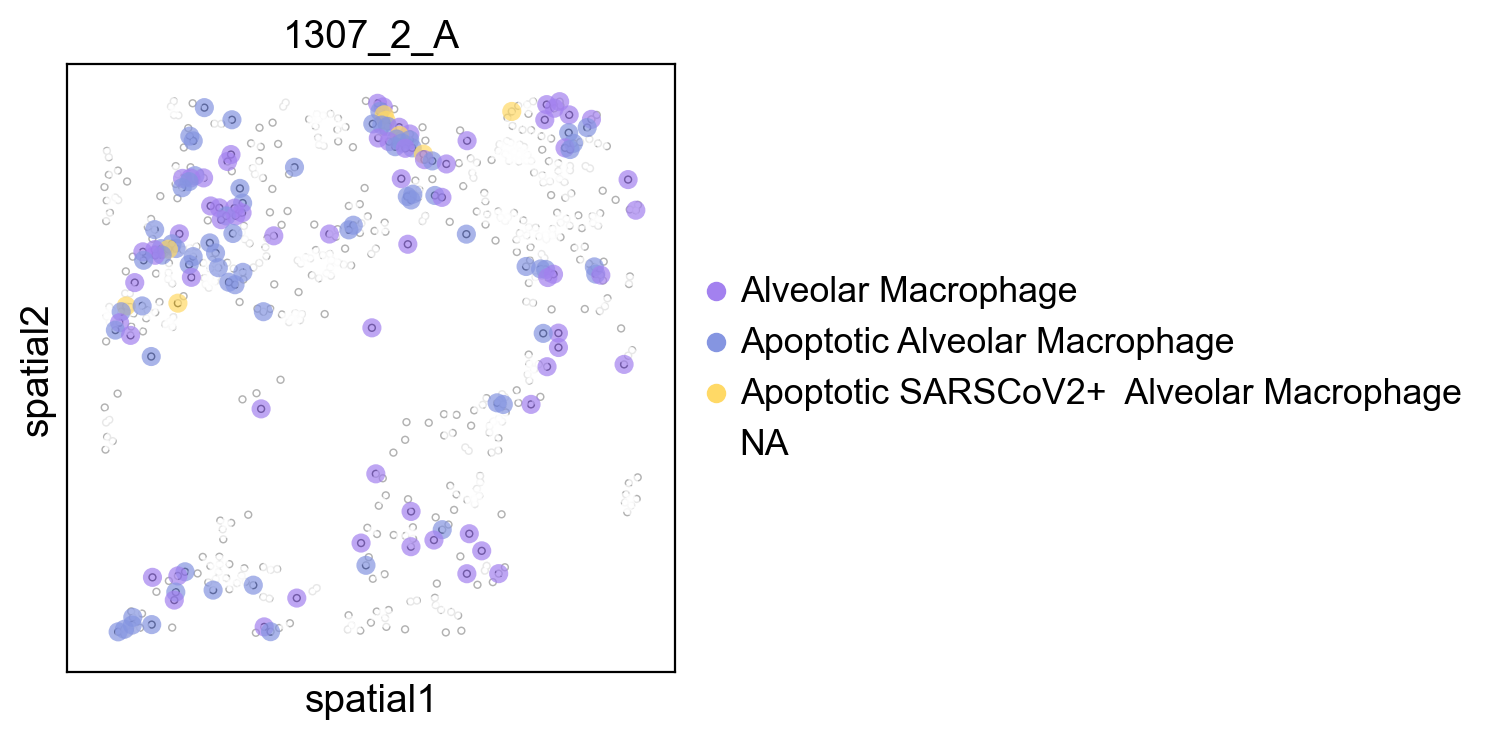

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


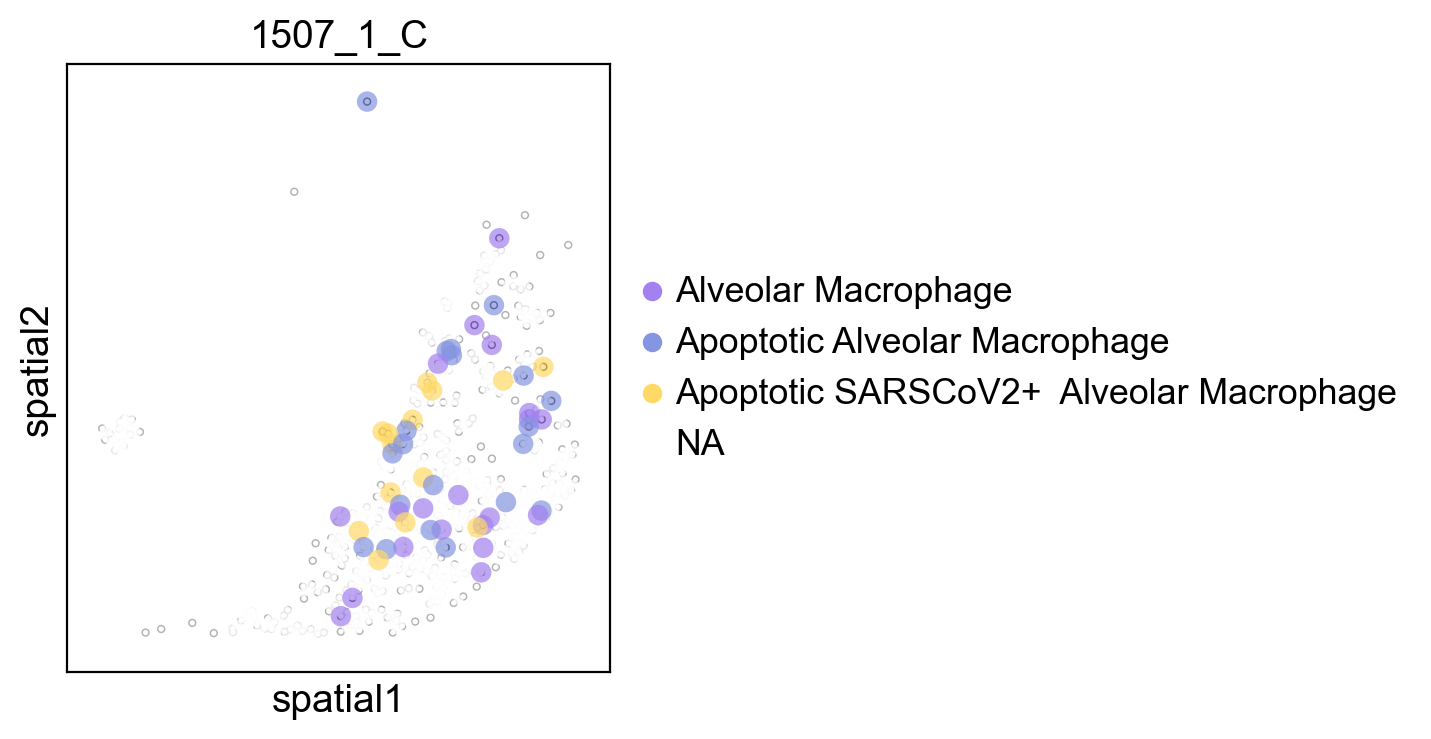

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


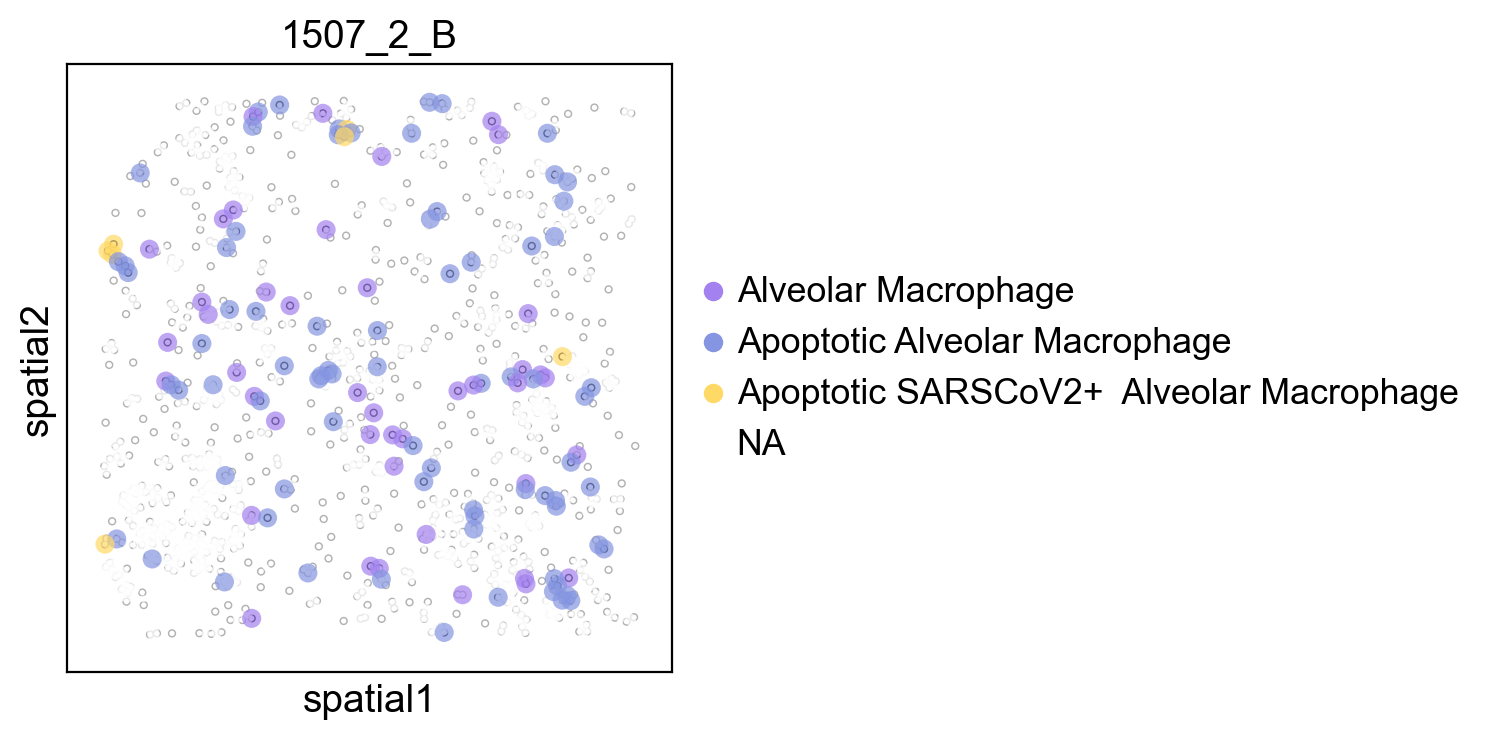

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


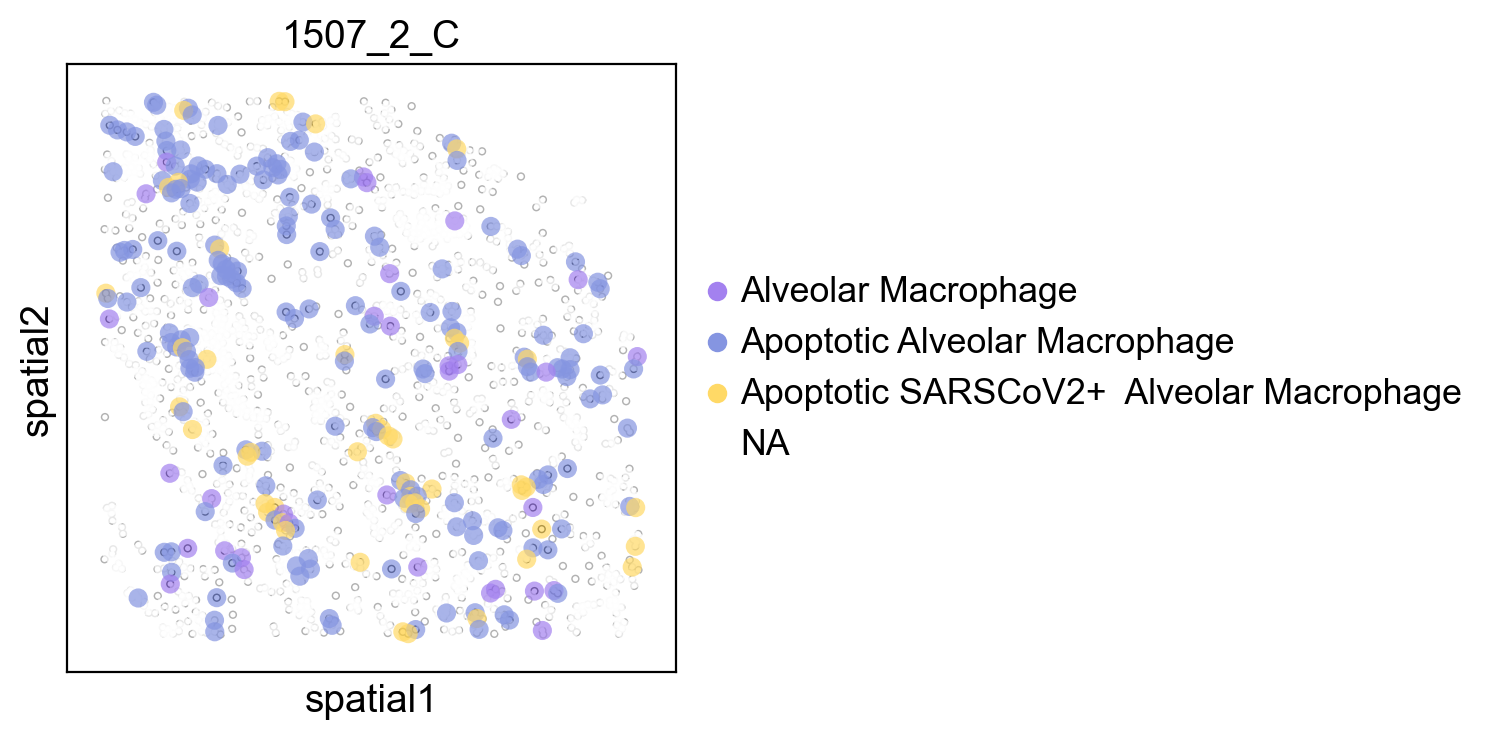

In [26]:
#COVID cases: use cases where there is no tissue image, compute a spatial graph based on a fixed neighbor radius that is informative given your experimental settings.
#method: using outputs from Michael's function
fields=['0305_1_A','0305_1_C','0305_2_A','0307_1_A','0605_2_C', '1307_2_A', '1507_1_C', '1507_2_B', '1507_2_C']
for i in fields:
    sc.pl.spatial(ad_COVID[ad_COVID.obs["ROI"] == i], color ='pheno_cluster_new', neighbors_key='spatial_neighbors', palette = colour_palette['colour'], 
                  spot_size=25, edges=False, edges_width=5, edges_color='black', img_key=None, title=i, 
                  groups=["Apoptotic SARSCoV2+  Alveolar Macrophage", "Alveolar Macrophage", "Apoptotic Alveolar Macrophage"], na_color='white',
                  add_outline=True,return_fig=True, save=str(i)+'.png')
    
    

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


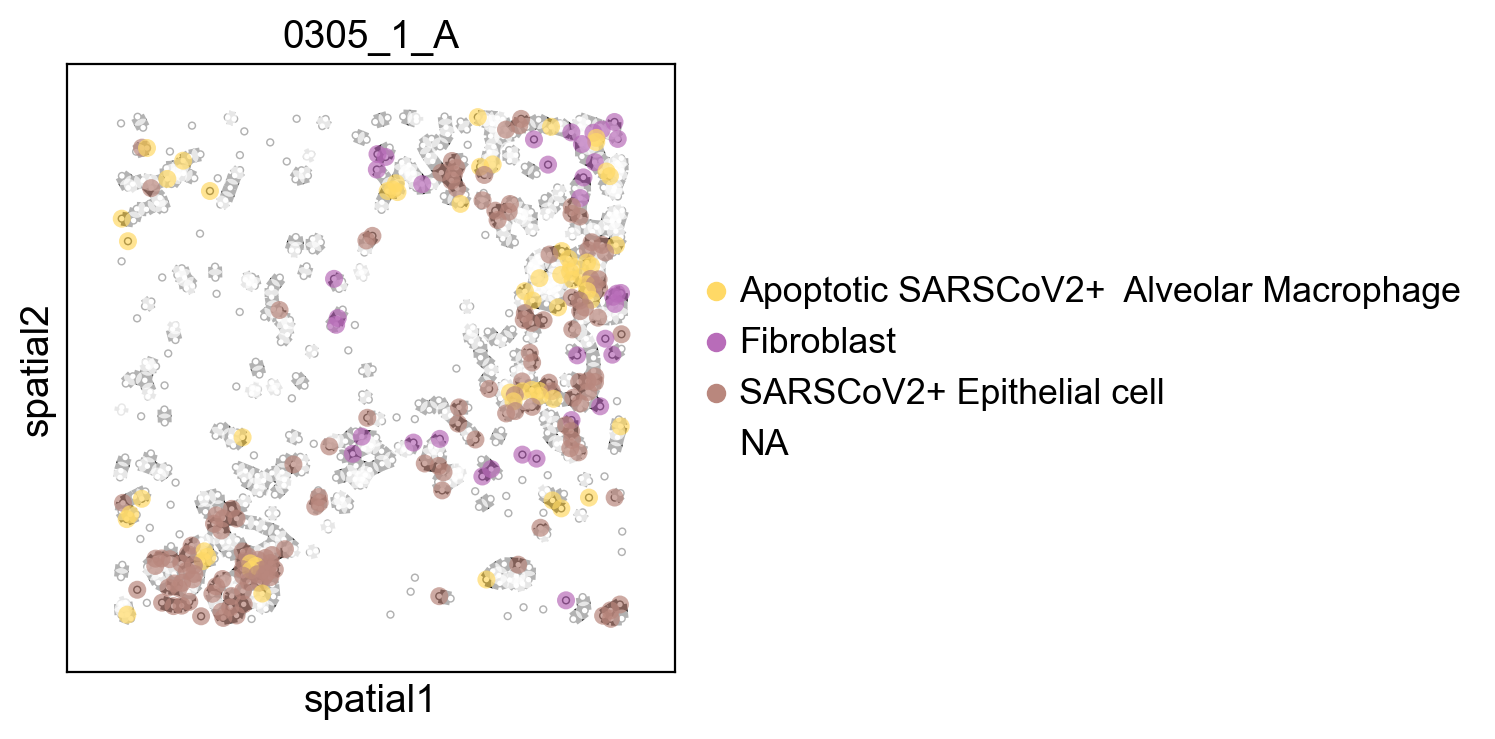

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


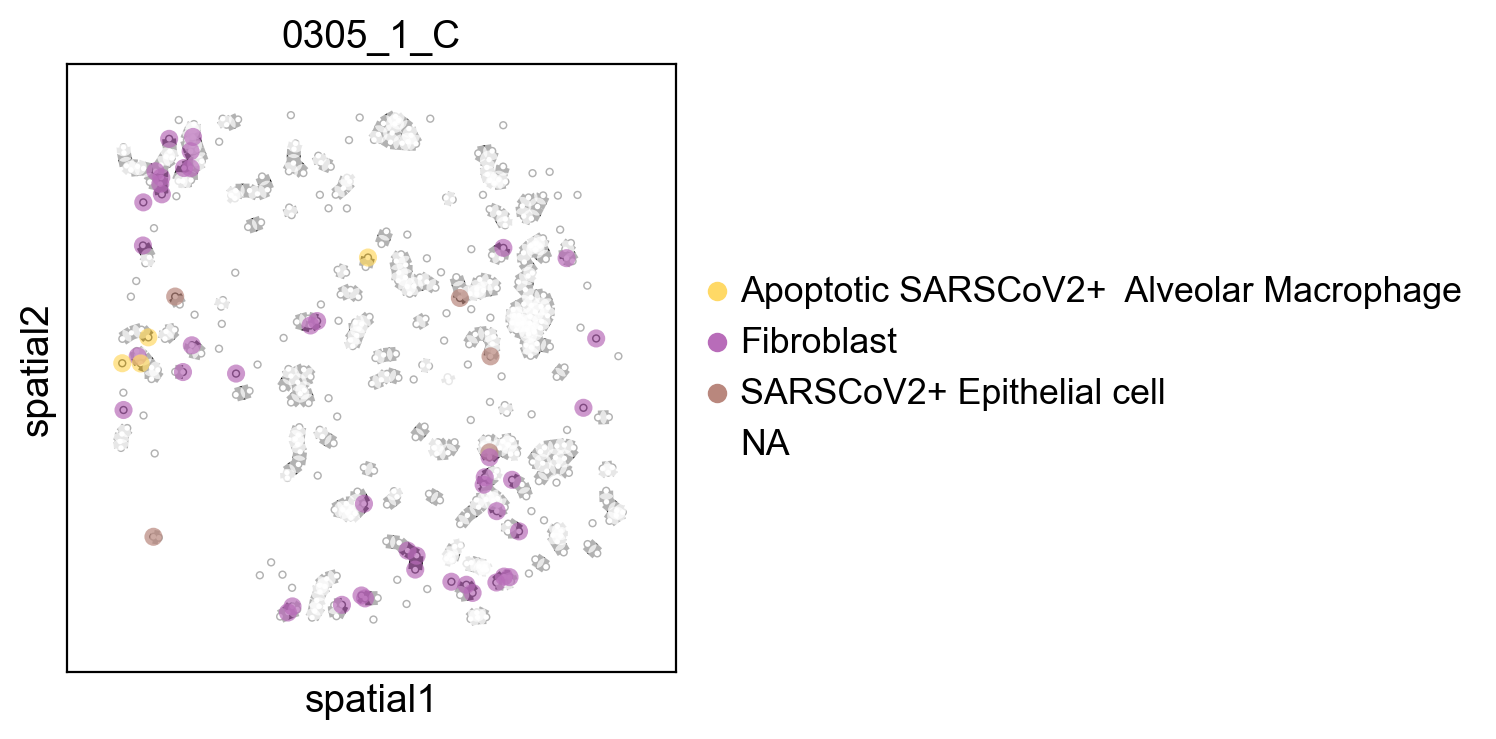

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


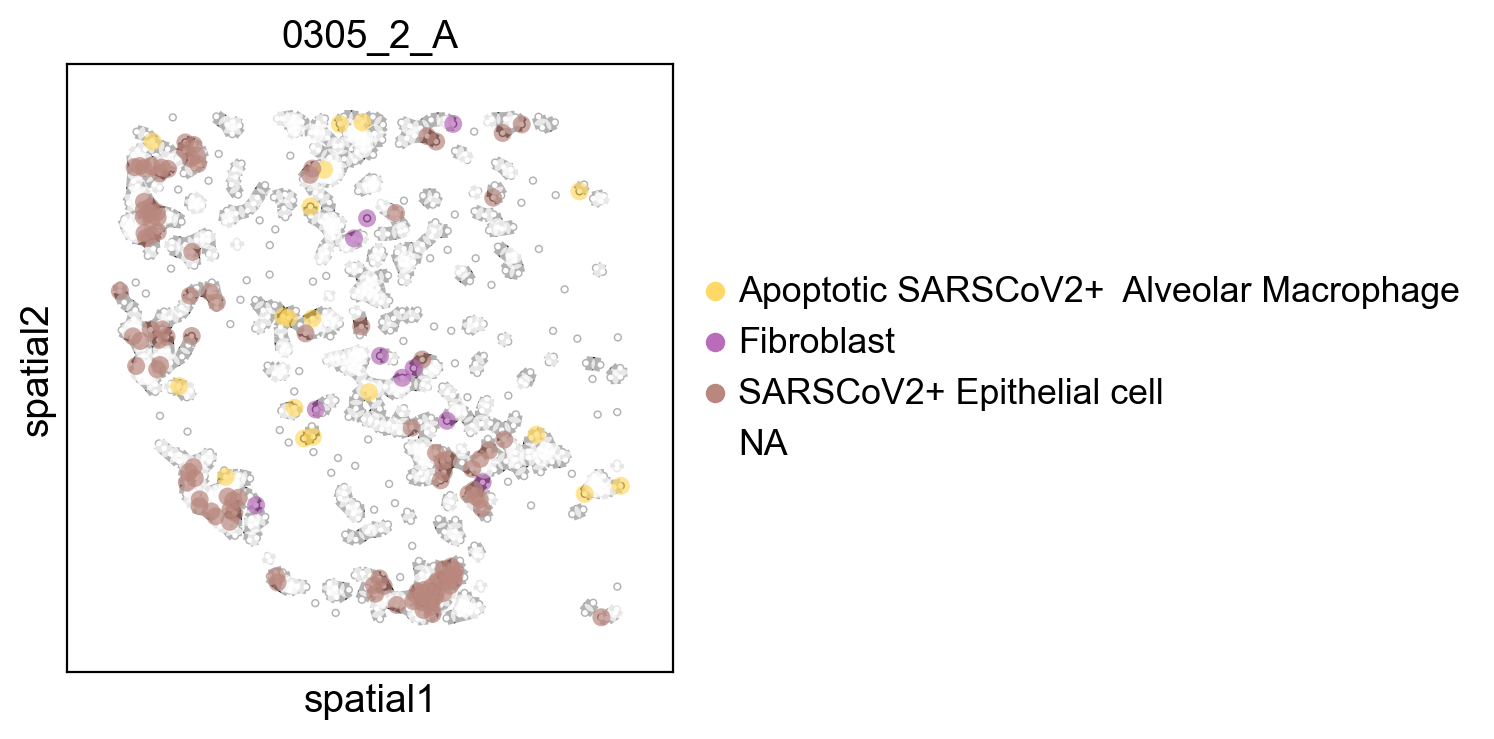

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


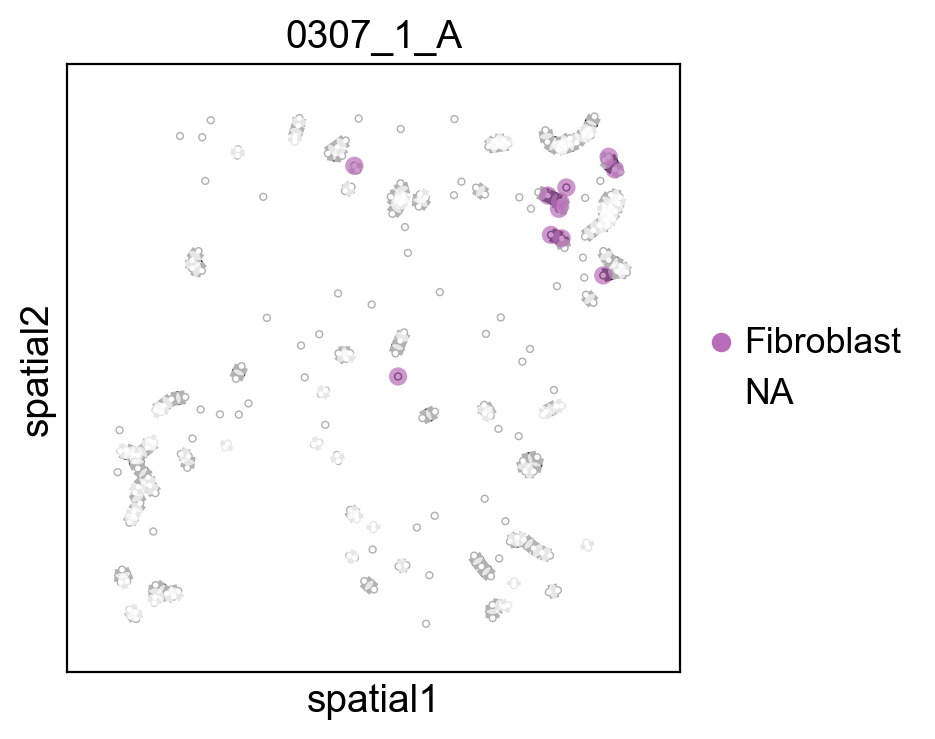

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


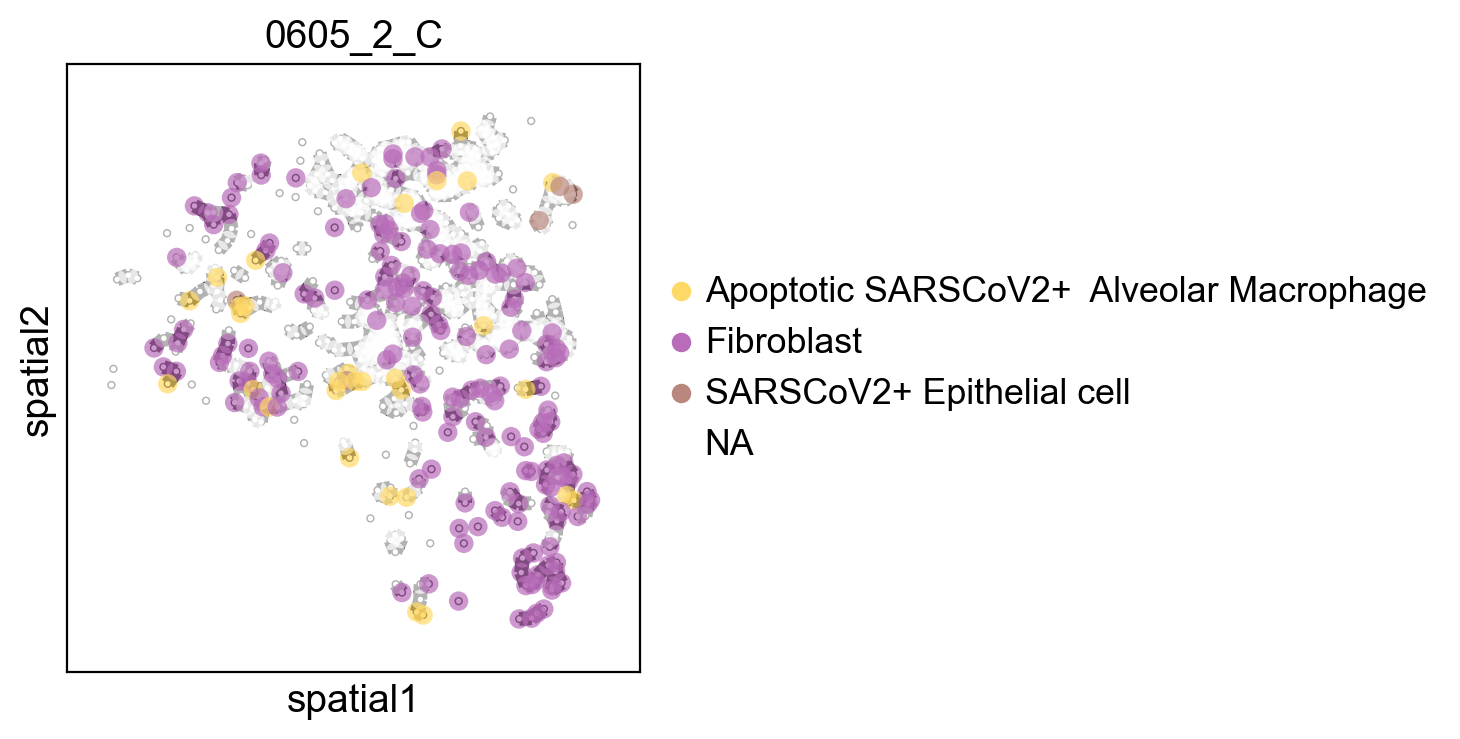

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


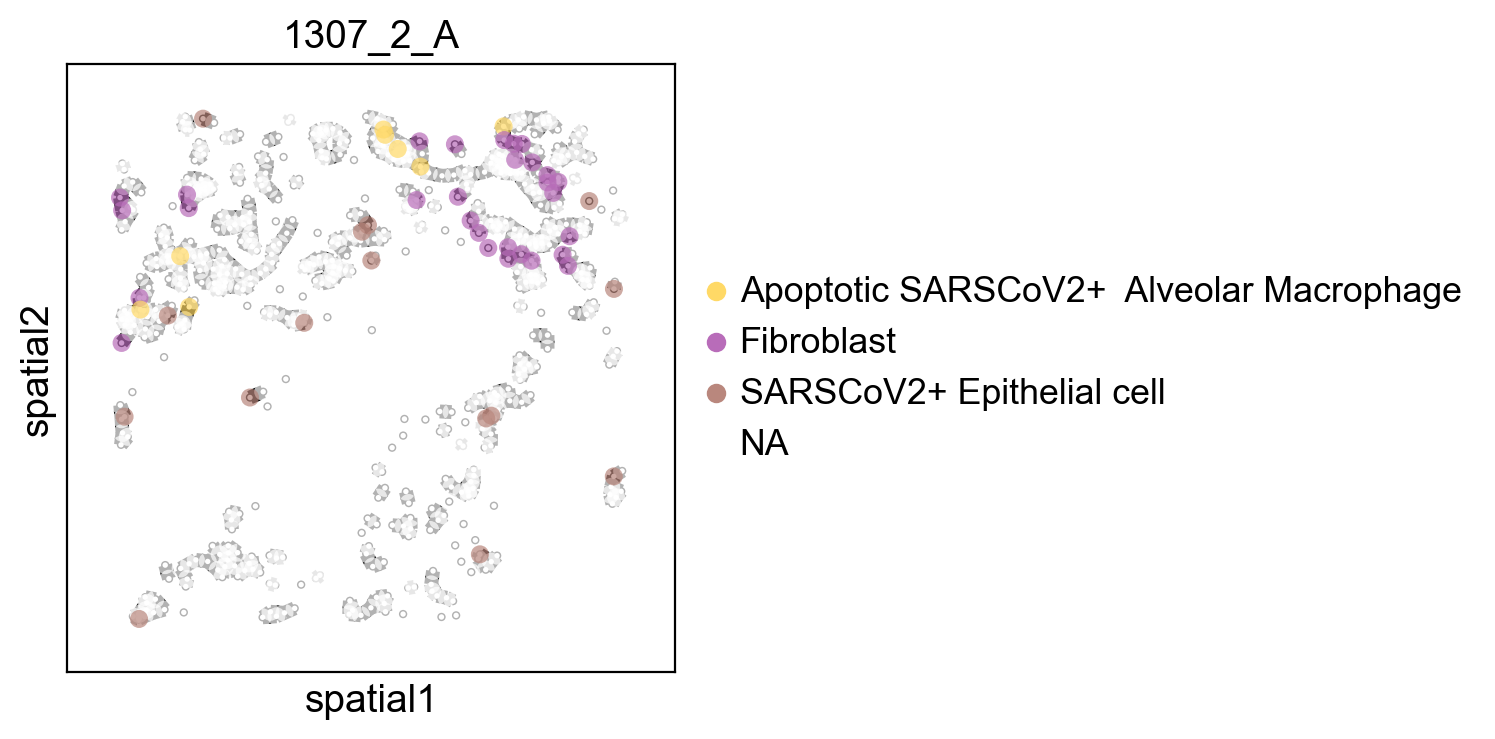

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


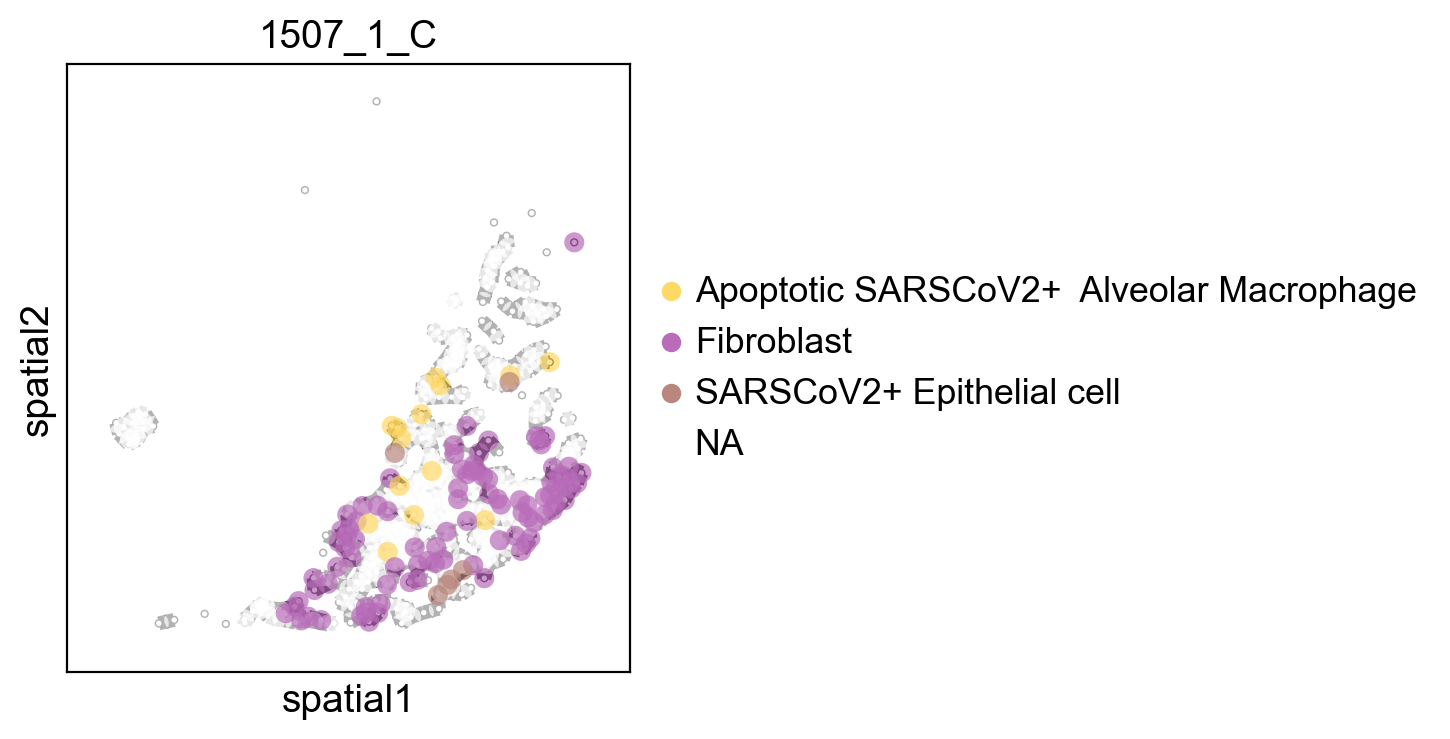

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


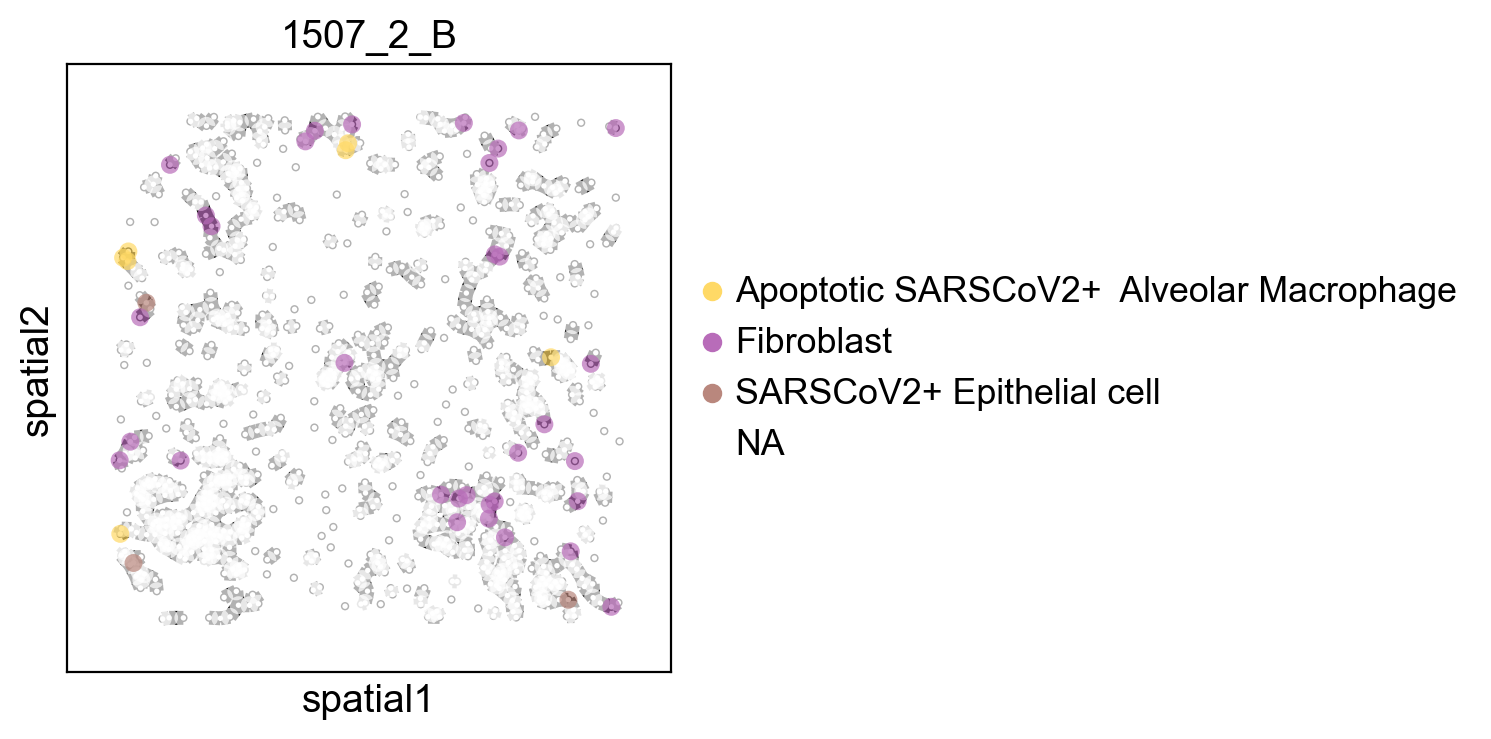

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


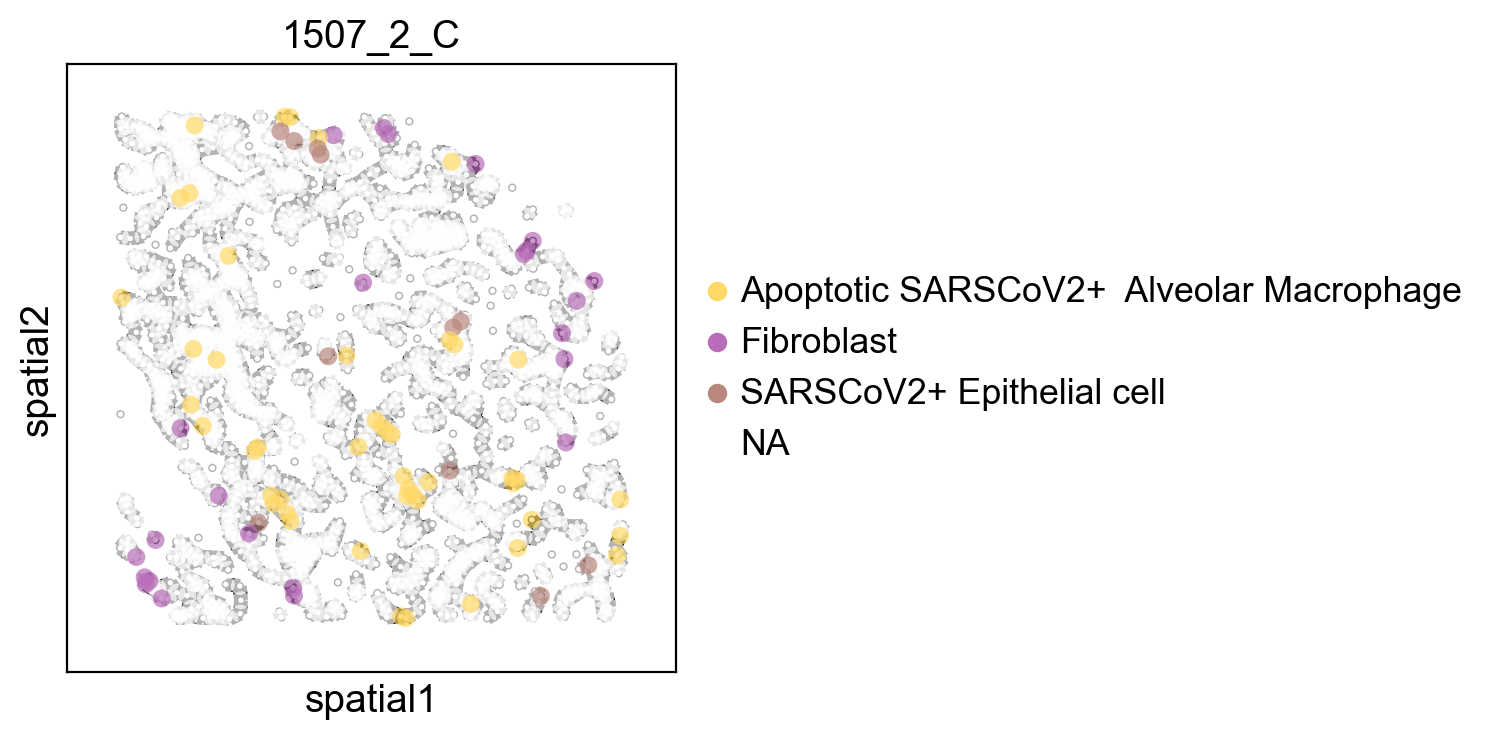

In [33]:
#COVID cases: use cases where there is no tissue image, compute a spatial graph based on a fixed neighbor radius that is informative given your experimental settings.
#method: using outputs from Michael's function
fields=['0305_1_A','0305_1_C','0305_2_A','0307_1_A','0605_2_C', '1307_2_A', '1507_1_C', '1507_2_B', '1507_2_C']
for i in fields:
    sc.pl.spatial(ad_COVID[ad_COVID.obs["ROI"] == i], color ='pheno_cluster_new', neighbors_key='spatial_neighbors', palette = colour_palette['colour'], 
                  spot_size=25, edges=True, edges_width=5, edges_color='black', img_key=None, title=i, 
                  groups=["Apoptotic SARSCoV2+  Alveolar Macrophage", "SARSCoV2+ Epithelial cell", "Fibroblast"], na_color='white',
                  add_outline=True,return_fig=True, save=str(i)+'.png')
    
    

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


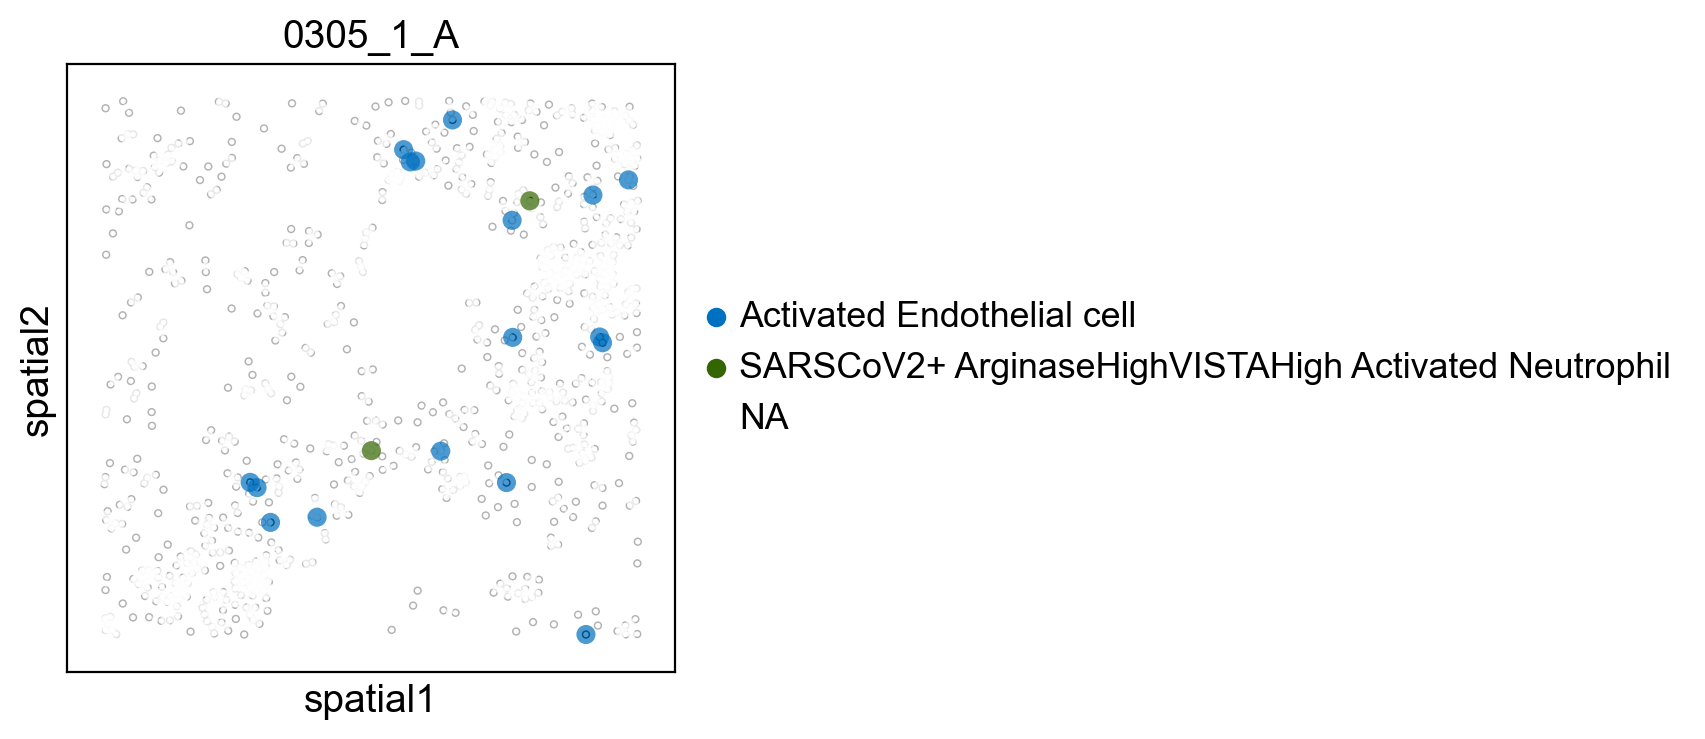

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


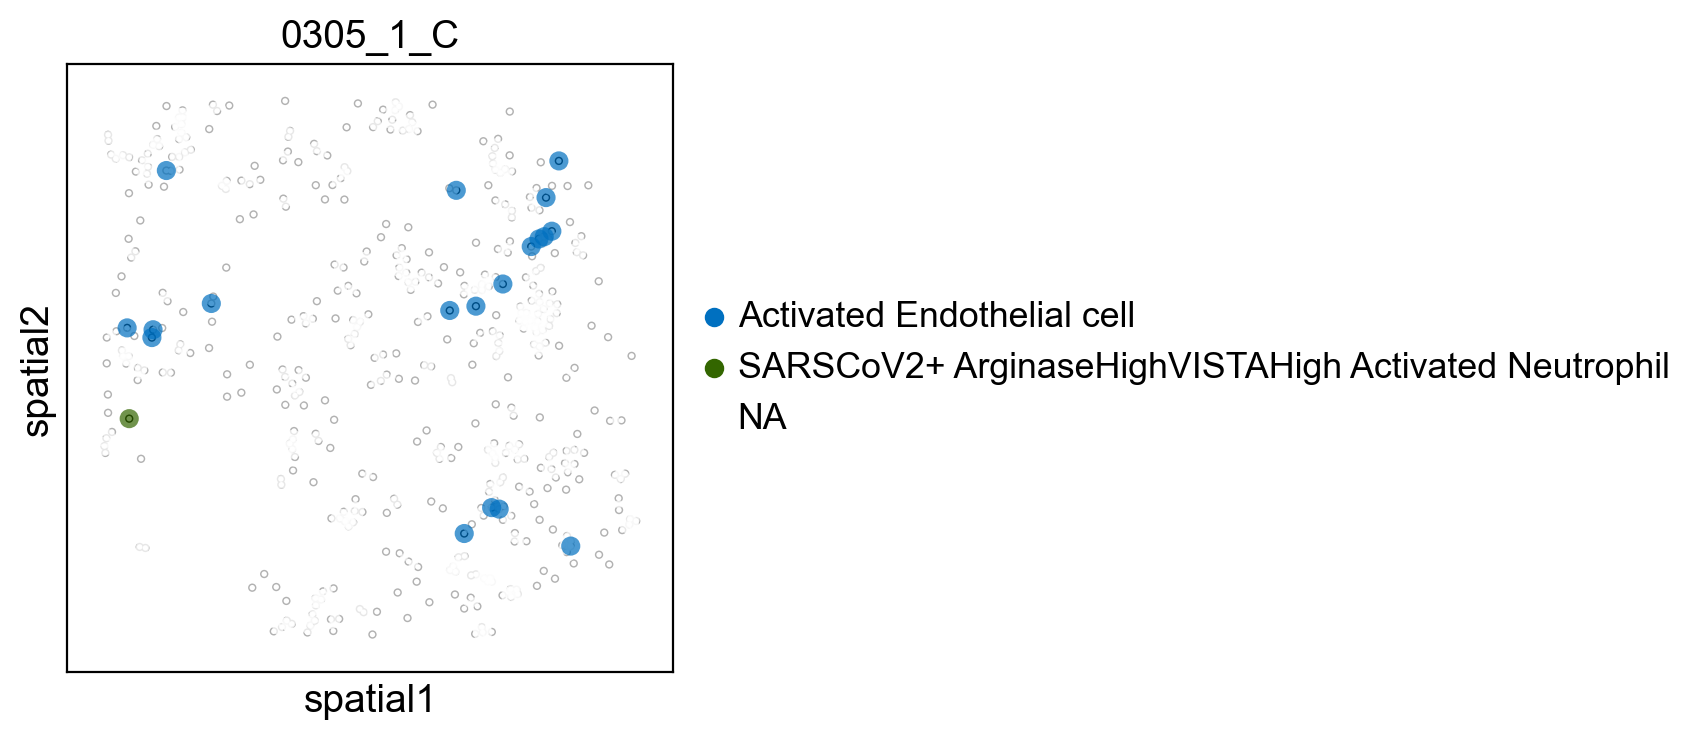

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


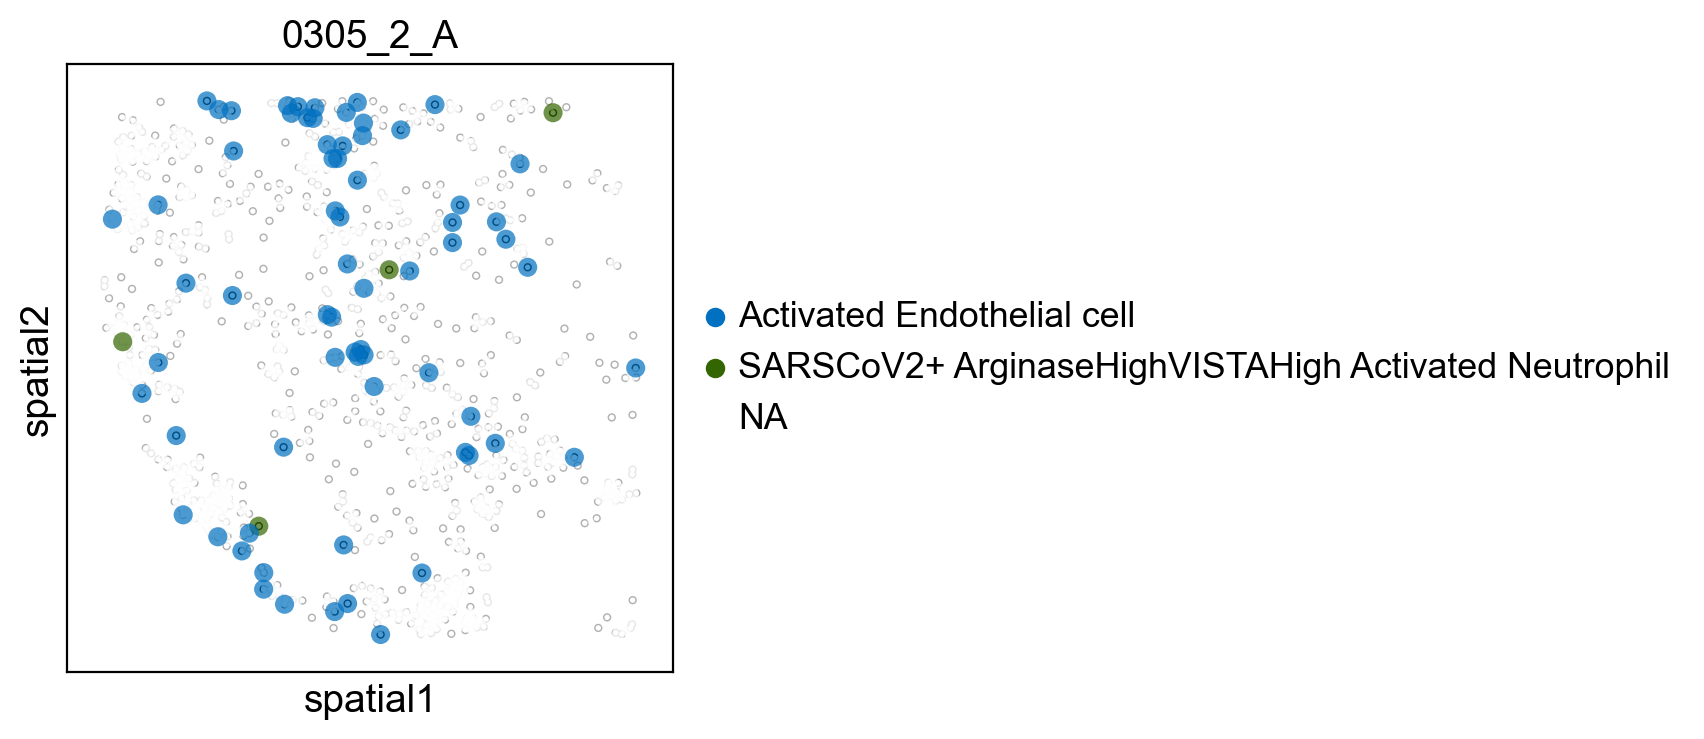

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


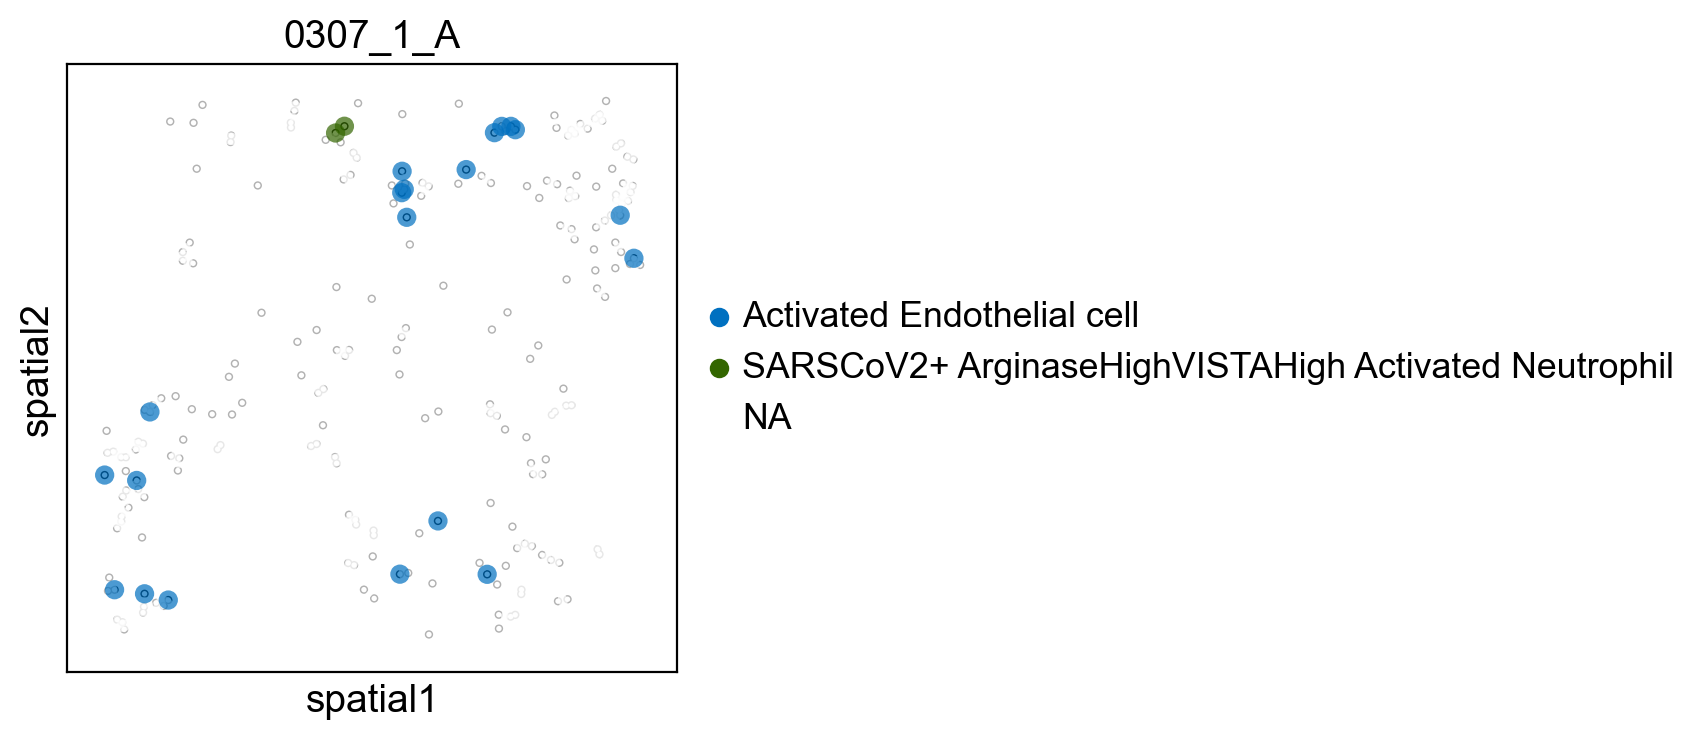

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


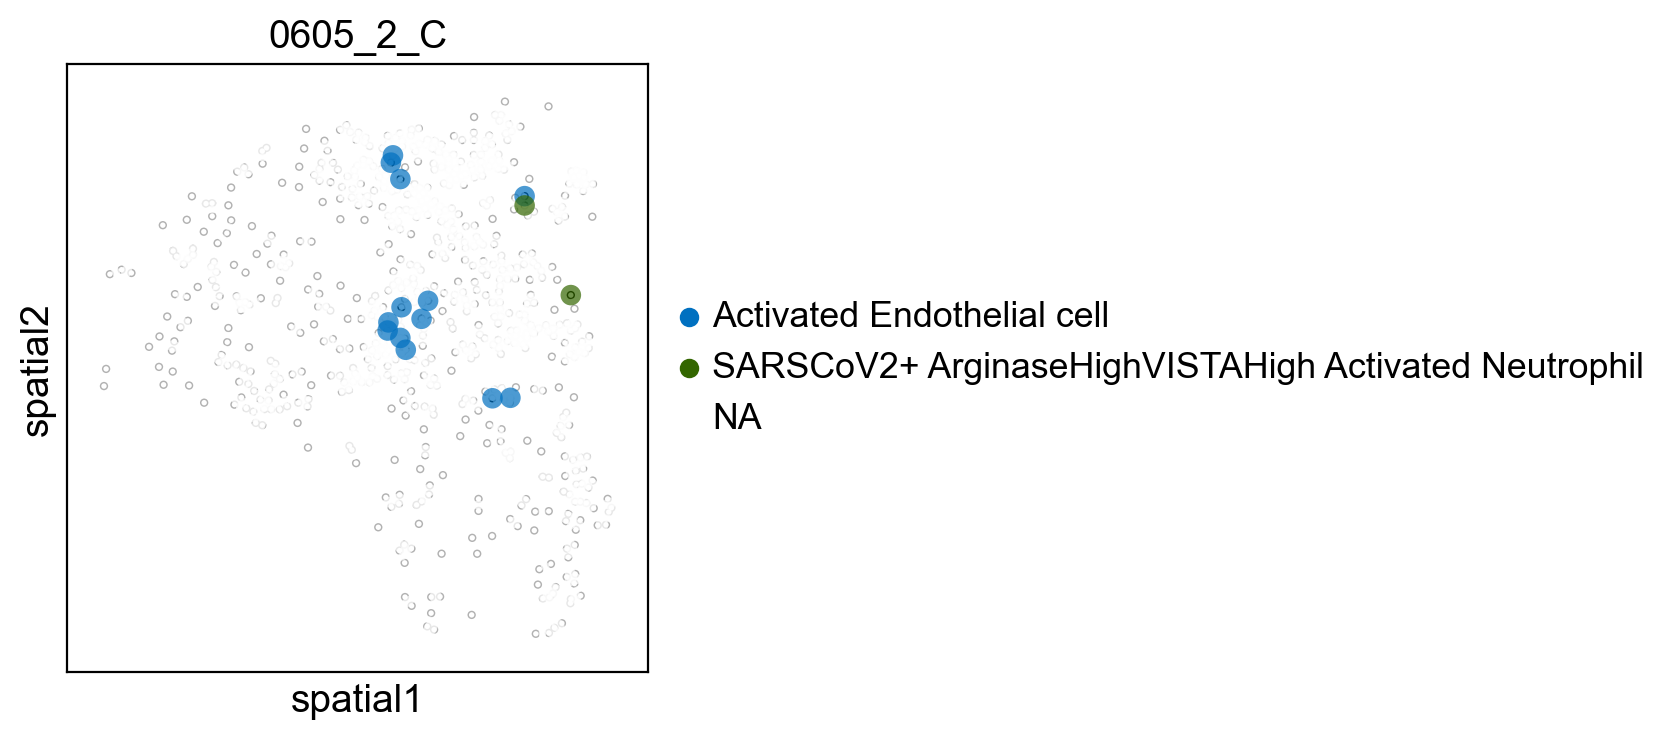

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


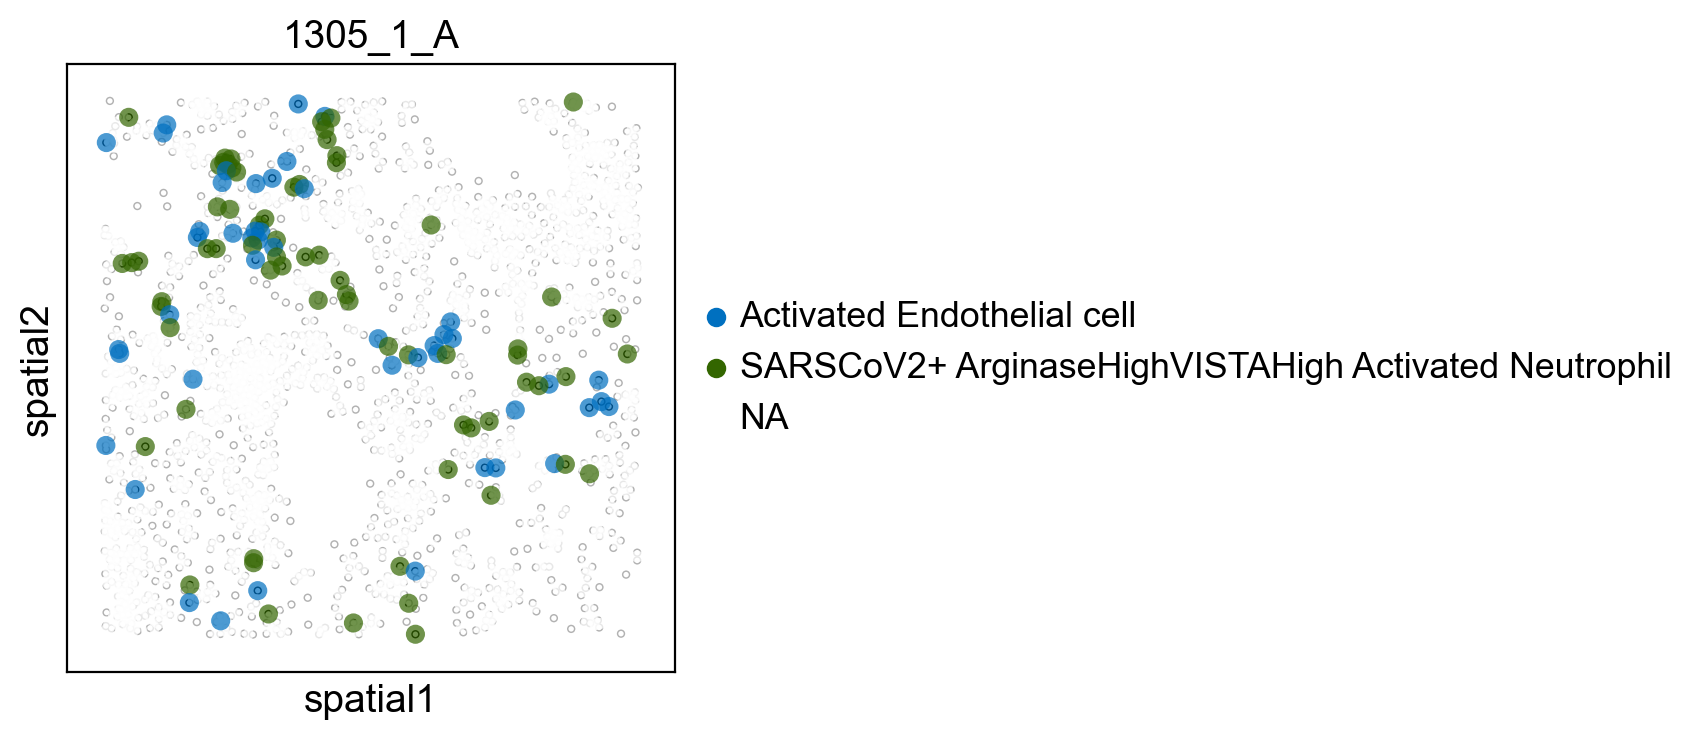

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


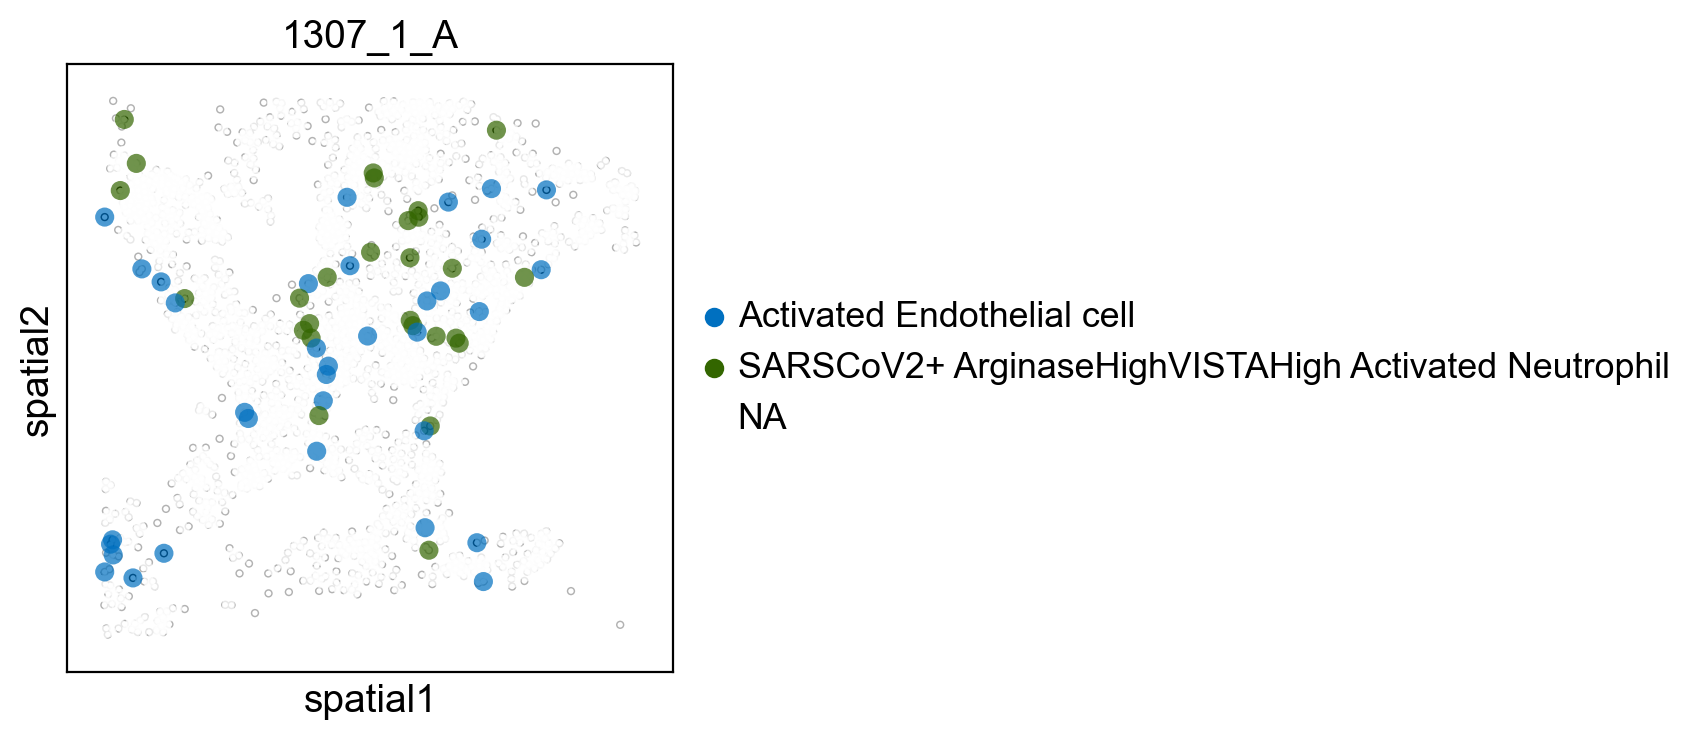

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


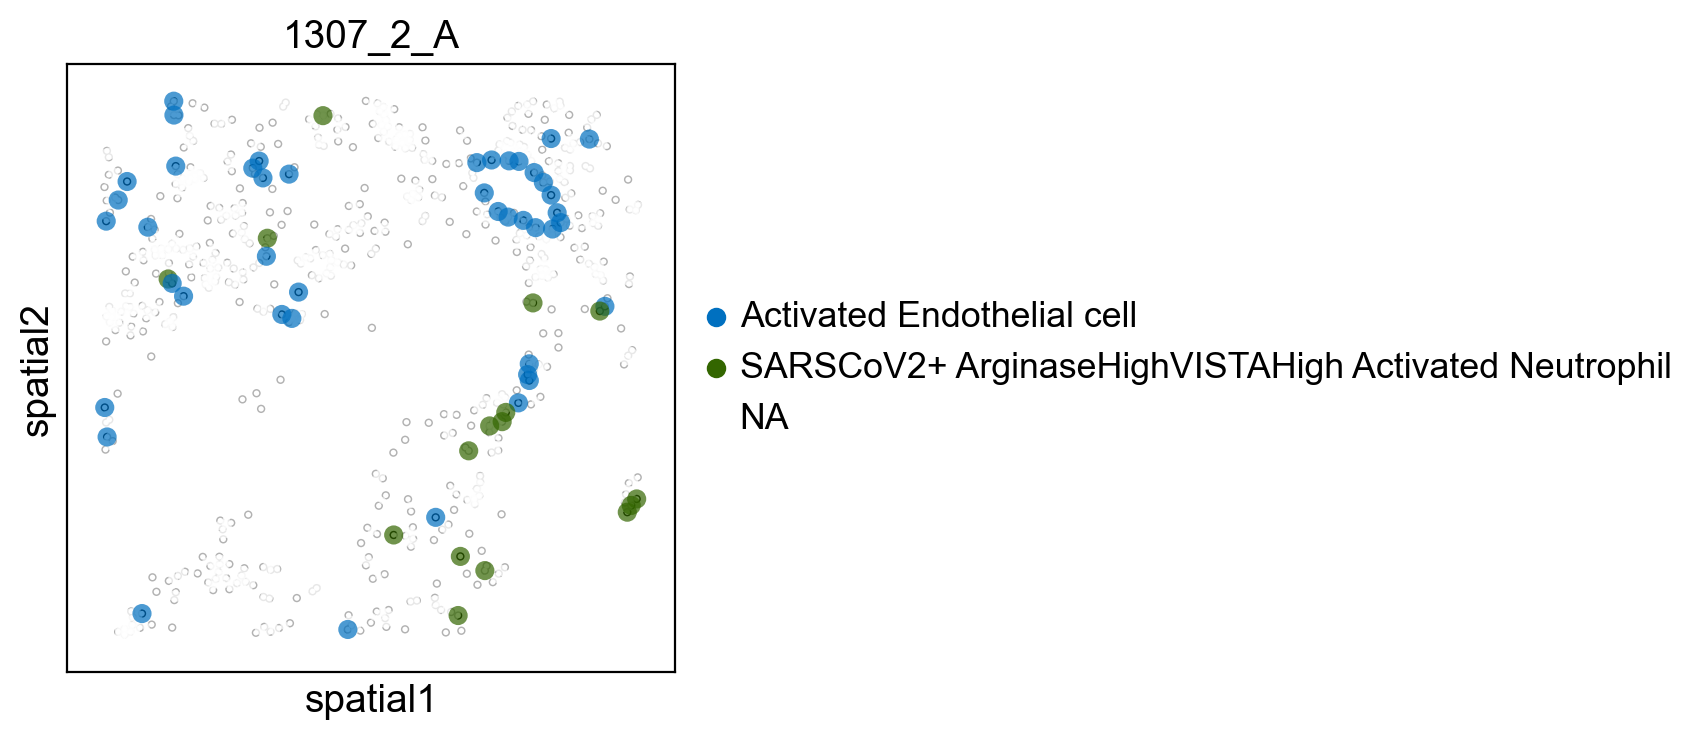

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


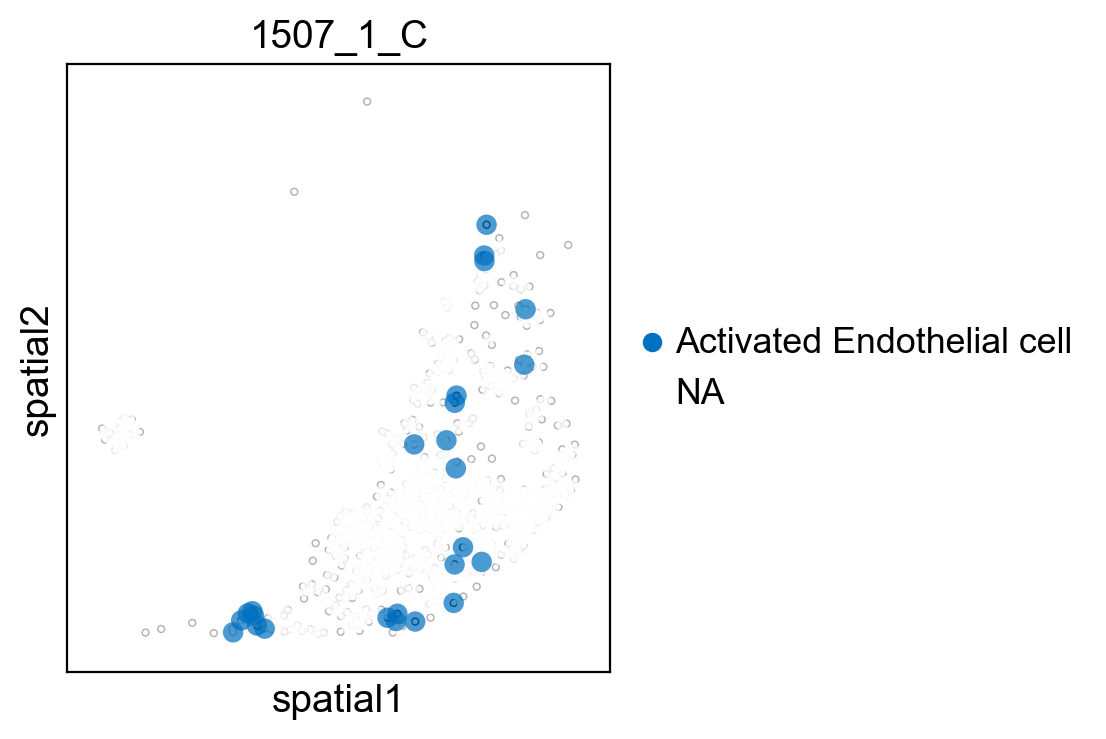

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


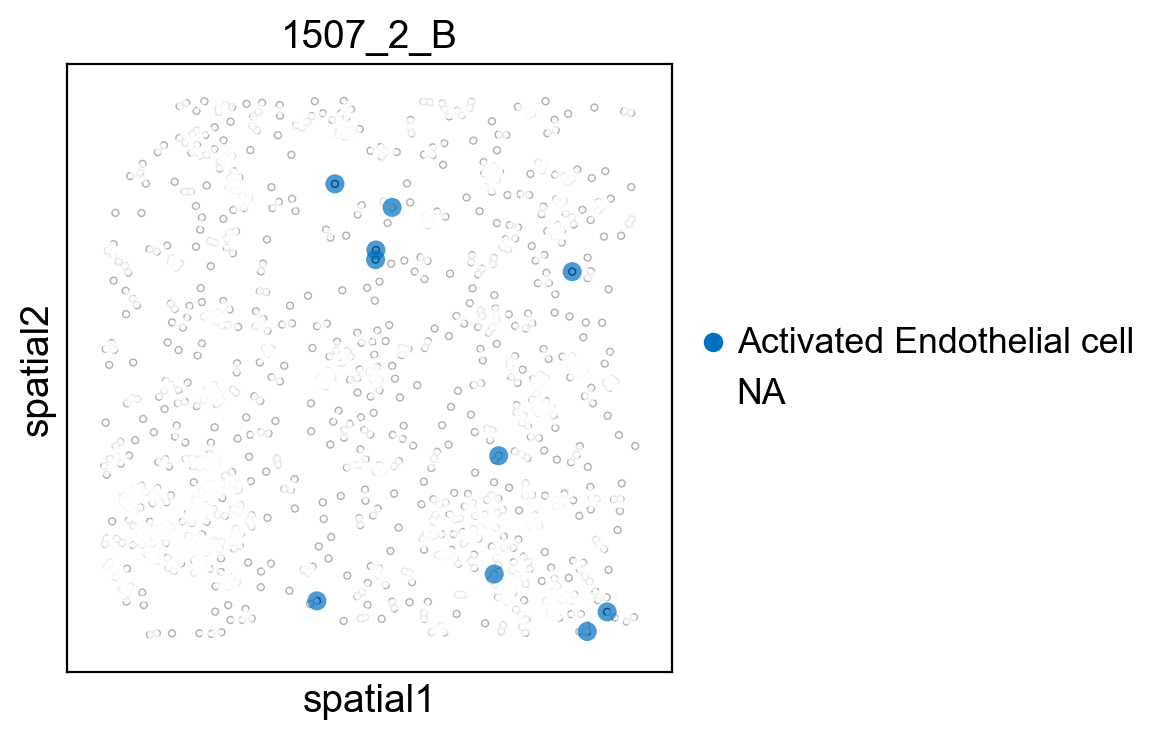

/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/Users/joaoluizsfilho/opt/anaconda3/envs/Squidpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


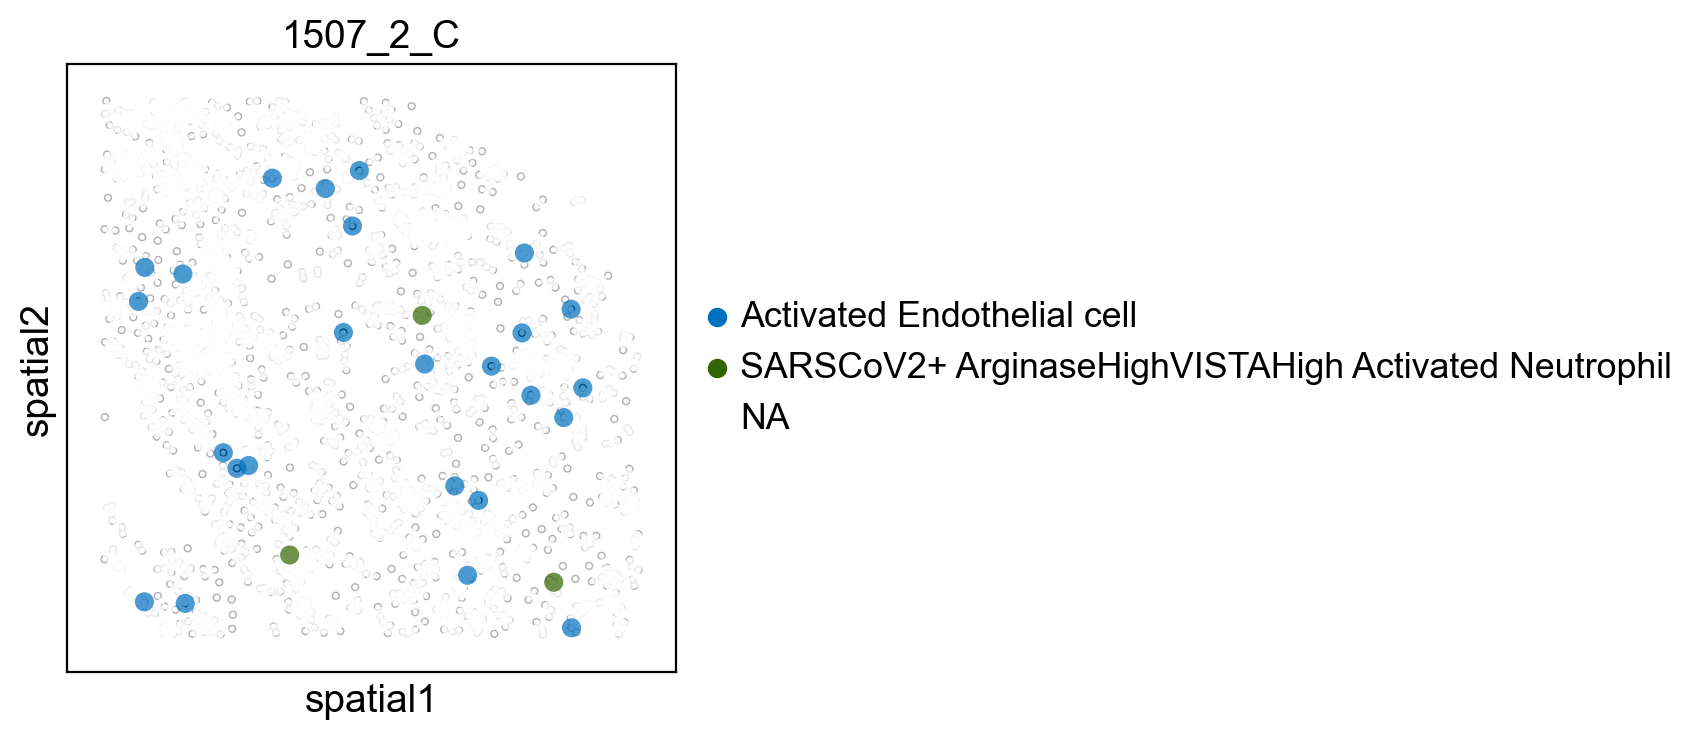

In [35]:
#COVID cases: use cases where there is no tissue image, compute a spatial graph based on a fixed neighbor radius that is informative given your experimental settings.
#method: using outputs from Michael's function
fields=['0305_1_A','0305_1_C','0305_2_A','0307_1_A','0605_2_C', '1305_1_A', '1307_1_A','1307_2_A', '1507_1_C', '1507_2_B', '1507_2_C']
for i in fields:
    sc.pl.spatial(ad_COVID[ad_COVID.obs["ROI"] == i], color ='pheno_cluster_new', neighbors_key='spatial_neighbors', palette = colour_palette['colour'], 
                  spot_size=25, edges=False, edges_width=5, edges_color='black', img_key=None, title=i, 
                  groups=["SARSCoV2+ ArginaseHighVISTAHigh Activated Neutrophil", "Activated Endothelial cell"], na_color='white',
                  add_outline=True,return_fig=True, save=str(i)+'.png')
    
    

In [ ]:
#CM2 death: use cases where there is no tissue image, compute a spatial graph based on a fixed neighbor radius that is informative given your experimental settings.
#method: using outputs from 10X Visium function
fields=['MP42-ROI1','MP42-ROI2','MP42-ROI3','MP61-ROI1','MP61-ROI2','MP61-ROI3','MP69-ROI1','MP69-ROI2',
       'MP69-ROI3','PM78-ROI1','PM78-ROI2','PM78-ROI3','PM83-ROI1','PM83-ROI2','PM83-ROI3',
       'PM102-ROI1','PM102-ROI2','PM102-ROI3']
for i in fields:
    sc.pl.spatial(adata_CM2_merge[adata_CM2_merge.obs["ROI"] == i], color ='pheno_cluster', neighbors_key='spatial_neighbors', palette = colour_palette['colour'], spot_size=10, 
                  edges=True, edges_width=0.5, edges_color='black', img_key=None, title=i, 
                  add_outline=False,return_fig=True, save=str(i)+'.png')
    
    

In [ ]:
#Non-CM cases: use cases where there is no tissue image, compute a spatial graph based on a fixed neighbor radius that is informative given your experimental settings.
#method: using outputs from 10X Visium function
fields=['MP41-ROI1','MP41-ROI2','MP41-ROI3','MP65-ROI1','MP65-ROI2','MP65-ROI3',
        'PM88-ROI1','PM88-ROI2','PM88-ROI3']
for i in fields:
    sc.pl.spatial(adata_nonCM_merge[adata_nonCM_merge.obs["ROI"] == i], color ='pheno_cluster', neighbors_key='spatial_neighbors', palette = colour_palette['colour'], spot_size=10, 
                  edges=True, edges_width=0.5, edges_color='black', img_key=None, title=i, 
                  add_outline=False,return_fig=True, save=str(i)+'.png')  
    

In [ ]:
#CM2 cases - highlighting specific groups of interactions
#method: using outputs from 10X Visium function
fields=['MP42-ROI1','MP42-ROI2','MP42-ROI3','MP61-ROI1','MP61-ROI2','MP61-ROI3','MP69-ROI1','MP69-ROI2',
       'MP69-ROI3','PM78-ROI1','PM78-ROI2','PM78-ROI3','PM83-ROI1','PM83-ROI2','PM83-ROI3',
       'PM102-ROI1','PM102-ROI2','PM102-ROI3']
for i in fields:
    sc.pl.spatial(adata_CM2_merge[adata_CM2_merge.obs["ROI"] == i], color ='pheno_cluster', palette = colour_palette['colour'], neighbors_key="spatial_neighbors", 
                  groups=["RBC", "Iba1+VISTA- Macrophage"], spot_size=18, 
                  edges=True, edges_width=1, edges_color='black', img_key=None, title=i, na_color='white',
                  add_outline=False,return_fig=True, save=str(i)+'.png')
    


In [ ]:
#NonCM cases - highlighting specific groups of interactions
#method: using outputs from 10X Visium function
fields=['MP41-ROI1','MP41-ROI2','MP41-ROI3','MP65-ROI1','MP65-ROI2','MP65-ROI3',
        'PM88-ROI1','PM88-ROI2','PM88-ROI3']
for i in fields:
    sc.pl.spatial(adata_nonCM_merge[adata_nonCM_merge.obs["ROI"] == i], color ='pheno_cluster', palette = colour_palette['colour'], neighbors_key="spatial_neighbors", 
                  groups=["Dendritic cell", "Activated B cell"], spot_size=18, 
                  edges=True, edges_width=1, edges_color='black', img_key=None, title=i, na_color='white',
                  add_outline=False,return_fig=True, save=str(i)+'.png')
    

# Extract z-scores from Neighborhood Enrichment Analysis

In [ ]:
cat_name = 'pheno_cluster_new'
sig_leiden = pd.DataFrame(columns=ad_COVID.var_names, index=ad_COVID.obs[cat_name].cat.categories)

sig_leiden = sig_leiden.transpose()
pheno_clusters = ['Cluster-' + str(x) for x in sig_leiden.columns.tolist()]

ser_counts = ad_COVID.obs['pheno_cluster_new'].value_counts()
ser_counts.name = 'cell counts'
meta_leiden = pd.DataFrame(ser_counts)

from scipy.cluster import hierarchy as sch
n_clusters = [4]
df_nhood_enr = pd.DataFrame(ad_COVID.uns['pheno_cluster_new_nhood_enrichment']['zscore'], columns=pheno_clusters, index=pheno_clusters)
nhood_cluster_levels = ['Level-' + str(x) for x in n_clusters]
linkage = sch.linkage(df_nhood_enr, method='average')
mat_nhood_clusters = sch.cut_tree(linkage, n_clusters=n_clusters)
df_cluster = pd.DataFrame(mat_nhood_clusters, columns=nhood_cluster_levels,
                                index=meta_leiden.index.tolist())

In [ ]:
df_nhood_enr 

In [ ]:
compression_opts = dict(method='zip',
                         archive_name='NE_COVID_zscore.csv') 
df_nhood_enr.to_csv('NE_COVID_zscore.zip', index=True, compression=compression_opts)

In [ ]:
pwd

In [ ]:
df_nhood_enr

In [ ]:
df = pd.read_csv("NE_COVID_zscore2.csv", index_col=0)
print(df.head(10))

In [ ]:
df

In [ ]:
col_df = pd.read_csv('mikeimc_approach/colours/pheno_colours2.csv')
colour_palette = col_df.set_index('pheno_cluster_new').to_dict()
colour_palette['colour']
color = colour_palette['colour']

In [ ]:
color

In [ ]:
cell = df.pop("Cell")

In [ ]:
cell

In [ ]:
row_colors = cell.map(color)
#sns.clustermap(iris, row_colors=row_colors)

In [ ]:
row_colors

In [ ]:
# Use the heatmap function from the seaborn package
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(df,cmap='bwr',linecolor=None, square=True, 
           vmin=-2, vmax=2, center=0, linewidths=0.30,ax=ax)

# Display the Pharma Sector Heatmap
plt.show()

In [ ]:
kws = dict(cbar_kws=dict(orientation='horizontal'), figsize=(12, 12))
g = sb.clustermap(df,cmap='bwr',linecolor=None,
           vmin=-2, vmax=2, center=0, linewidths=0.30, row_cluster=False, col_cluster=False,
           row_colors=row_colors, xticklabels=True, **kws)

x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0.95, g.ax_row_dendrogram.get_position().width, 0.02])
g.ax_cbar.set_title('zscore')
g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('white')
    g.ax_cbar.spines[spine].set_linewidth(1)
plt.show()
g.savefig("NE_COVID_zscore.pdf", format="pdf", bbox_inches="tight")

#cbar_pos= (0, 0.65, .03, .2)

# Interaction Matrix

Outputs from the 10X visium approach and Michael approach are different

In [ ]:
#The function computes the number of shared edges in the neighbor graph between clusters.
sq.gr.interaction_matrix(ad_COVID, cluster_key="pheno_cluster", normalized=False)
sq.pl.interaction_matrix(ad_COVID, cluster_key="pheno_cluster",vmax=40000, cmap='inferno',save='COVID_interaction_matrix.png')

In [ ]:
#The function computes the number of shared edges in the neighbor graph between clusters.
sq.gr.interaction_matrix(ad_Pneumonia, cluster_key="pheno_cluster", normalized=False)
sq.pl.interaction_matrix(ad_Pneumonia, cluster_key="pheno_cluster",vmax=40000, cmap='inferno',save='Pneumonia_interaction_matrix.png')

In [ ]:
#The function computes the number of shared edges in the neighbor graph between clusters.
sq.gr.interaction_matrix(ad_Non_Pneumonia, cluster_key="pheno_cluster", normalized=False)
sq.pl.interaction_matrix(ad_Non_Pneumonia, cluster_key="pheno_cluster",vmax=40000, cmap='inferno',save='Non_Pneumonia_interaction_matrix.png')

In [ ]:
#The function computes the number of shared edges in the neighbor graph between clusters.
sq.gr.interaction_matrix(ad_HIV_NEG, cluster_key="pheno_cluster", normalized=False)
sq.pl.interaction_matrix(ad_HIV_NEG, cluster_key="pheno_cluster",vmax=40000, cmap='inferno',save='HIV_NEG_interaction_matrix.png')

In [ ]:
#The function computes the number of shared edges in the neighbor graph between clusters.
sq.gr.interaction_matrix(ad_HIV_POS, cluster_key="pheno_cluster", normalized=False)
sq.pl.interaction_matrix(ad_HIV_POS, cluster_key="pheno_cluster",vmax=40000, cmap='inferno',save='HIV_POS_interaction_matrix.png')

# Ripley’s statistics

Outputs from the 10X visium approach and Michael approach are the same

In [ ]:
mode = "L"
sq.gr.ripley(ad_HIV_NEG, cluster_key="pheno_cluster", mode='L', max_dist=500, copy=False, seed=1234)
sq.pl.ripley(ad_HIV_NEG, cluster_key="pheno_cluster", palette=colour_palette['colour'], mode=mode, save='HIV_NEG_ripley_pheno_cluster.png')


In [ ]:
mode = "L"
sq.gr.ripley(ad_HIV_POS, cluster_key="pheno_cluster", mode='L', max_dist=500, copy=False, seed=1234)
sq.pl.ripley(ad_HIV_POS, cluster_key="pheno_cluster", palette=colour_palette['colour'], mode=mode, save='HIV_POS_ripley_pheno_cluster.png')


In [ ]:
mode = "L"
sq.gr.ripley(ad_COVID, cluster_key="pheno_cluster", mode='L', max_dist=500, copy=False, seed=1234)
sq.pl.ripley(ad_COVID, cluster_key="pheno_cluster", palette=colour_palette['colour'], mode=mode, save='COVID_ripley_pheno_cluster.png')


In [ ]:
mode = "L"
sq.gr.ripley(ad_Pneumonia, cluster_key="pheno_cluster", mode='L', max_dist=500, copy=False, seed=1234)
sq.pl.ripley(ad_Pneumonia, cluster_key="pheno_cluster", palette=colour_palette['colour'], mode=mode, save='Pneumonia_ripley_pheno_cluster.png')


In [ ]:
mode = "L"
sq.gr.ripley(ad_Non_Pneumonia, cluster_key="pheno_cluster", mode='L', max_dist=500, copy=False, seed=1234)
sq.pl.ripley(ad_Non_Pneumonia, cluster_key="pheno_cluster", palette=colour_palette['colour'], mode=mode, save='Non___ripley_pheno_cluster.png')


Other method to calculate Ripley's L - here it will calculate the score for each cluster for each ROI to be averaged afterwards - it should generate similar results as above

In [ ]:
cluster_key = 'pheno_cluster'

ripley_results_df = pd.DataFrame(columns=['bins',cluster_key,'stats','ROI'])
sims_results_df = pd.DataFrame(columns=['bins','simulations','stats','ROI'])

for roi in ad_HIV_NEG.obs.ROI.cat.categories:
    a1 = ad_HIV_NEG[ad_HIV_NEG.obs.ROI==roi]
    #a2 = a1[a1.obs.hierarchy=='Myeloid'].copy() if want to calculate in a specific cell type
    
    sq.gr.ripley(a1, cluster_key=cluster_key, mode='L', max_dist=500)
    #sq.pl.ripley(a2, cluster_key="phen_cluster", mode='L')
    #plt.show()
    
    ripley_results = a1.uns[f'{cluster_key}_ripley_L']['L_stat']
    ripley_results['ROI'] = roi
    
    sims_results = a1.uns[f'{cluster_key}_ripley_L']['sims_stat']
    sims_results['ROI'] = roi
    
    ripley_results_df = pd.concat([ripley_results_df, ripley_results])
    sims_results_df = pd.concat([sims_results_df, sims_results])
    
plt.rcParams['figure.figsize']=(4,4)

rip_summary = ripley_results_df.groupby(['bins',cluster_key]).mean()
sims_summary = sims_results_df.groupby(['bins']).mean().reset_index()

ax = sb.lineplot(
    y="stats",
    x="bins",
    ci="sd",
    hue=cluster_key,
    palette = colour_palette['colour'],
    data=rip_summary,
)

# This plots the simulated data
#sb.lineplot(y="stats", x="bins", ci="sd", alpha=0.1, color="gray", data=sims_summary)

ax.legend(bbox_to_anchor=(1, 1))

plt.savefig('HIV_NEG_RipleysL_Michael.png')

#ripley_results_df.to_csv('ripley.csv') 


# Centrality Scores

Outputs from the 10X visium approach and Michael approach are different - Here Michael's makes more sense.

In [ ]:
#Save output panda data frame to csv file
df = sq.gr.centrality_scores(
    adata_non_CM,
    cluster_key="pheno_cluster", copy=True
)

compression_opts = dict(method='zip',
                         archive_name='NonCM_centrality_scores_pheno_cluster.csv') 
df.to_csv('NonCM_centrality_scores_pheno_cluster.zip', index=True, compression=compression_opts)

In [ ]:
cluster_key = "pheno_cluster"
sq.gr.centrality_scores(ad_COVID, cluster_key, show_progress_bar=True)

In [ ]:
data = ad_COVID.uns[f'{cluster_key}_centrality_scores'].reset_index()

fig, axs = plt.subplots(1, 3, figsize=(16, 6), dpi=300)
fig.tight_layout()
plt.subplots_adjust(wspace = 0.2)

for count, i in enumerate(['closeness_centrality','degree_centrality','average_clustering']):

    sb.barplot(data = data, 
               x = "index", 
               y = i, 
               ci=68,
               ax=axs[count],
               palette=colour_palette['colour'],
              order=data.sort_values(i)['index']
              )
    
    #if i=='average_clustering':
        #axs[count].set(ylim=(0.48, 0.52))
    
    axs[count].set_title(i)
    axs[count].tick_params(axis='x', labelrotation = 90)
    axs[count].tick_params(axis='y', labelsize=10)
    plt.xticks(rotation=90)
    #axs[count].set_ylabel('Difference', fontsize=12)

#fig.savefig('HIV_POS_network_centrality_scores.png')

In [ ]:
cluster_key = "pheno_cluster"
sq.gr.centrality_scores(ad_Non_Pneumonia, cluster_key, show_progress_bar=True)

In [ ]:
data = ad_Non_Pneumonia.uns[f'{cluster_key}_centrality_scores'].reset_index()

fig, axs = plt.subplots(1, 3, figsize=(16, 6), dpi=300)
fig.tight_layout()
plt.subplots_adjust(wspace = 0.2)

for count, i in enumerate(['closeness_centrality','degree_centrality','average_clustering']):

    sb.barplot(data = data, 
               x = "index", 
               y = i, 
               ci=68,
               ax=axs[count],
               palette=colour_palette['colour'],
              order=data.sort_values(i)['index']
              )
    
    #if i=='average_clustering':
        #axs[count].set(ylim=(0.48, 0.52))
    
    axs[count].set_title(i)
    axs[count].tick_params(axis='x', labelrotation = 90)
    axs[count].tick_params(axis='y', labelsize=10)
    plt.xticks(rotation=90)
    #axs[count].set_ylabel('Difference', fontsize=12)

#fig.savefig('HIV_NEG_network_centrality_scores.png')

# Co-occurrence across spatial dimensions

In [ ]:
#Plot co-occurence score to visualize cluster co-occurrence in spatial dimensions using the original spatial coordinates. 
#We visualize the result for two conditional groups, here use the virus-infected cells.
sq.gr.co_occurrence(ad_COVID, cluster_key='pheno_cluster', spatial_key='spatial', copy=False)

In [ ]:
#Plot co-occurence score to visualize cluster co-occurrence in spatial dimensions using the original spatial coordinates. 
#We visualize the result for two conditional groups, here use the virus-infected cells.
sq.gr.co_occurrence(ad_HIV_POS, cluster_key='pheno_cluster', spatial_key='spatial', copy=False)

In [ ]:
#Plot co-occurence score to visualize cluster co-occurrence in spatial dimensions using the original spatial coordinates. 
#We visualize the result for two conditional groups, here use the virus-infected cells.
sq.gr.co_occurrence(ad_HIV_NEG, cluster_key='pheno_cluster', spatial_key='spatial', copy=False)

In [ ]:
#from matplotlib.colors import ListedColormap

sq.pl.co_occurrence(
    adata_nonCM_merge,
    cluster_key='pheno_cluster',
    clusters=['CD4 T cell'],
    figsize=(20, 10), save='CM2_RBC_co_ocurrence.png'
)

# Spatially variable proteins with spatial autocorrelation statistics

Use outputs from the 10X visium approach 

In [ ]:
#two spatial autocorrelation statistics: Moran’s I and Geary’s C*. 
#They provide a score on the degree of spatial variability of gene expression. 
#The statistic as well as the p-value are computed for each gene, and FDR correction is performed. 
df = sq.gr.spatial_autocorr(ad_COVID, mode="moran")
ad_COVID.uns["moranI"].head(50)

In [ ]:
#All CM2 cases
fields=['MP42-ROI1','MP42-ROI2','MP42-ROI3','MP61-ROI1','MP61-ROI2','MP61-ROI3','MP69-ROI1','MP69-ROI2',
       'MP69-ROI3','PM78-ROI1','PM78-ROI2','PM78-ROI3','PM83-ROI1','PM83-ROI2','PM83-ROI3',
       'PM102-ROI1','PM102-ROI2','PM102-ROI3']
for i in fields:
    sc.pl.spatial(adata_CM2_merge[adata_CM2_merge.obs["ROI"] == i], cmap='Reds', neighbors_key="spatial_neighbors", color=adata_CM2_merge.var_names, spot_size=15, vmax=0.75, 
                  edges=False, edges_width=10, edges_color='black', img_key=None, title=i, add_outline=False,return_fig=True, save=str(i)+'.png')
    

In [ ]:
#two spatial autocorrelation statistics: Moran’s I and Geary’s C*. 
#They provide a score on the degree of spatial variability of gene expression. 
#The statistic as well as the p-value are computed for each gene, and FDR correction is performed. 
df = sq.gr.spatial_autocorr(adata_non_CM, mode="moran")
adata_non_CM.uns["moranI"].head(50)

In [ ]:
##All Non CM cases
fields=['MP41-ROI1','MP41-ROI2','MP41-ROI3','MP65-ROI1','MP65-ROI2','MP65-ROI3',
        'PM88-ROI1','PM88-ROI2','PM88-ROI3']
for i in fields:
    sc.pl.spatial(adata_nonCM_merge[adata_nonCM_merge.obs["ROI"] == i], cmap='Reds', neighbors_key="spatial_neighbors", color=['CD45RA', 'CD20', 'CD14', 'CD27', 'HLADR','CD4'], spot_size=15, vmax=0.75, edges=False, edges_width=10, edges_color='black', 
                  img_key=None, title=i, add_outline=False,return_fig=True, save=str(i)+'.png')
        
#color=adata_nonCM_merge.var_names

# Ligand-receptor interactions

In [ ]:
from omnipath.interactions import import_intercell_network
from omnipath import clear_cache

clear_cache()
df = import_intercell_network(transmitter_params={"categories": "ligand"}, receiver_params={"categories": "receptor"})

print(df['source'].isnull().sum())  # should print 0

In [ ]:
sq.gr.ligrec(
    adata_CM2_merge,
    n_perms=100,
    cluster_key="pheno_cluster", use_raw=False
)

# Voroni plots

In [ ]:
from voronoi_imc import draw_voronoi_scatter

for i in adata_subset3.obs['ROI'].unique().tolist():

    spot = adata_subset3.obs[adata_subset3.obs['ROI']==i]

    _ = draw_voronoi_scatter(spot=spot,
                             c=[],
                             voronoi_palette = colour_palette['colour'],
                             X='X_loc',
                             Y='Y_loc',
                             voronoi_hue='pheno_cluster')
    plt.savefig(str(i)+'.png')

# LISA clust

Web app: https://shiny.maths.usyd.edu.au/lisaClust/

In [ ]:
#Specify the cluster that has population information in the adata.obs

cluster_id='pheno_cluster'

adata_subset3.obs[['ROI',cluster_id,'X_loc','Y_loc']].to_csv('lisaclust_export.csv')

Upload the 'lisaclust_export.csv' to the web app above, and then download the results as 'LISAclust.csv' in this folder

Importing data from LISA analysis from web app

This will add in the LISA results to the adata.obs as a new column

In [ ]:
mikeimc_v2.lisa_import(adata_subset3,LISA_file = 'LISA_annotated_data_4regions.csv',LISA_col_title = 'LISAclust')

In [ ]:
for i in ['LISAclust']: 

    for x in ['cell_type','hierarchy']:
        
        tmp = pd.crosstab(adata_subset3.obs[i],adata_subset3.obs[x], normalize='index')
        tmp.plot.bar(stacked=True, figsize=(3, 3)).legend(bbox_to_anchor=(1.02, 1))

In [ ]:
col_df = pd.read_excel('mikeimc_approach/colours/pheno_colours.xls')
colour_palette = col_df.set_index('pheno_cluster').to_dict()
colour_palette['colour']

In [ ]:
for i in ['LISAclust']: 
    tmp = pd.crosstab(adata_subset3.obs[i],adata_subset3.obs['pheno_cluster'], normalize='index')
    tmp.plot.bar(stacked=True, color=colour_palette['colour'], figsize=(3, 3)).legend(bbox_to_anchor=(1.02, 1))

Heatmaps

In [ ]:
LISA_clust_obs='LISAclust'
population_id='pheno_cluster'

vmax=0.6
vmin=0
figsize=(30,16)

fig, axs = plt.subplots(figsize=figsize)
tmp = pd.crosstab(adata_subset3.obs[population_id], adata_subset3.obs[LISA_clust_obs], normalize='index')
sb.heatmap(data=tmp, robust=True,linewidths=.5,square=True,cmap='viridis',vmax=vmax, vmin=vmin, ax=axs)
fig.savefig('LISAclust_heatmap.png', bbox_inches='tight')

In [ ]:
adata_subset3

In [ ]:
fields=['0905_2_A','1207_1_A','1307_1_A','1405_1_C']
for i in fields:
    sc.pl.spatial(adata_subset3[adata_subset3.obs["ROI"] == i], neighbors_key="spatial_neighbors", color= 'LISAclust', spot_size=10, vmax=0.75, edges=False, edges_width=10, edges_color='black', 
                  img_key=None, title=i, add_outline=False,return_fig=True, save=str(i)+'.png')
        
        